## Optimisation Objective: 

__Alternative view of Logistic Regression__: 
# $ h_\theta(x) = \hat{p} = \frac{1}{1 + e^{-\theta^TX}}$

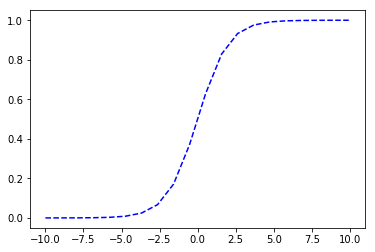

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(-10,10,20)
y = 1/(1 + np.exp(-x))
plt.plot(x,y,"b--")

#### In logistic regression, if y = 1 for $x_i$ , we want that $h_\theta(x)$ be as close to 1 as possible. 
#### In other words, in logistic regression, if y = 1, we want that $\theta^T.x$ be $>> 0$ (Much Greater than 0)
#### Conversely , if y = 0 for $x_i$ , we want that $h_\theta(x)$ be as close to 0 as possible. 
#### In other words, in logistic regression, if y = 0, we want that $\theta^T.x$ be $ << 0$(Much Less than 0). 

__Cost of Single Example: __ 
- This is the cost that a single training example contributes to the whole cost of the model: 

# $ -(y log h_\theta(x) + (1-y) log (1 - h_\theta(x)))$
## $ = -(y log \frac{1}{1 + e^{-\theta^TX}}) + (1-y) log (1 - \frac{1}{1 + e^{-\theta^TX}}))$

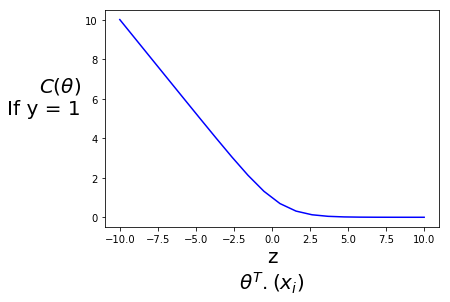

In [2]:
### For y = 1: 
z = np.arange(-10,10)
plt.plot(x, -np.log(1/(1+np.exp(-z))), "b-")
plt.xlabel("z\n"+r"$\theta^T.(x_i)$",
          fontsize = 20)
plt.ylabel(r"$C(\theta)$"+"\nIf y = 1", rotation = 0,
           ha = "right", fontsize = 20)


- __As we see, if $ y = 1 $, the cost is very low / 0 as $\theta^T.x_i$ tends to $+\infty$__
- __The cost increases as $\theta^T.x_i$ tends to $-\infty$__
- This is exactly why logistic regression tries to have parameters such that $\theta^T.x_i >> 0$ when $y = 1$, as a larger value of $\theta^T.x_i$ will correspond to a smaller cost. 

- For the Support Vector Machine, we are going to have a similar cost function. 
- If we have $y = 1$ and $\theta^T.x_i$ is $>= 1$,(__NOT JUST >= 0__) we will have exactly 0 error. 
- If we have $y = 1$ and $\theta^T.x_i$ is $< 1$, we will increase the error linearly in the left, similar to the curve shown above, except it will increase linearly as $\theta^T.x_i$ tends to $-\infty$
- Don't worry about the slope of the increasing error. It doesn't matter that much. I've plotted a slope of 1. 
- This function is labeled $ Cost_1(z) = Cost_1(\theta^T.x_i)$. 

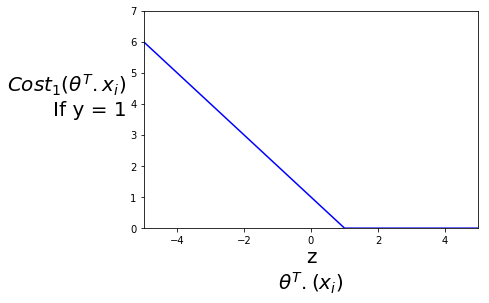

In [3]:
def costy1(x):
    y = []
    for z in x:    
        if z >= 1:
            y.append(0)
        else:
            y.append(-(z-1))
    return y

x = np.arange(-10,10)
y = costy1(x)
plt.plot(x, y, "b-")
plt.axis([-5,5,0,7])
plt.xlabel("z\n"+r"$\theta^T.(x_i)$",
          fontsize = 20)
plt.ylabel(r"$Cost_1(\theta^T.x_i)$"+"\nIf y = 1", rotation = 0,
           ha = "right", fontsize = 20)

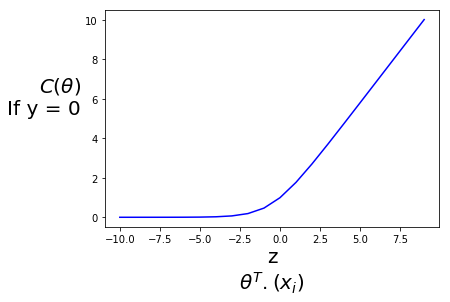

In [4]:
### For y = 0: 
z = np.linspace(-10,10,20)
plt.plot(x, -np.log(1 - (1/(1+np.exp(-z)))), "b-")
plt.xlabel("z\n"+r"$\theta^T.(x_i)$",
          fontsize = 20)
plt.ylabel(r"$C(\theta)$"+"\nIf y = 0", rotation = 0,
           ha = "right", fontsize = 20)

- __As we see, if $ y = 0 $, the cost is very low / 0 as $\theta^T.x_i$ tends to $-\infty$__
- __The cost increases as $\theta^T.x_i$ tends to $+\infty$__
- This is exactly why logistic regression tries to have parameters such that $\theta^T.x_i << 0$ when $y = 0$, as a smaller/negative of $\theta^T.x_i$ will correspond to a smaller cost. 

- For the Support Vector Machine, we are going to have a similar cost function. 
- If we have $y = 0$ and $\theta^T.x_i$ is $<= -1$(__NOT JUST < 0__), we will have exactly 0 error. 
- If we have $y = 0$ and $\theta^T.x_i$ is $> -1$, we will increase the error linearly in the right, similar to the curve shown above, except it will increase linearly as $\theta^T.x_i$ tends to $+\infty$
- Don't worry about the slope of the increasing error. It doesn't matter that much. I've plotted a slope of 1. 
- This function is labeled $ Cost_0(z) = Cost_0(\theta^T.x_i)$. 

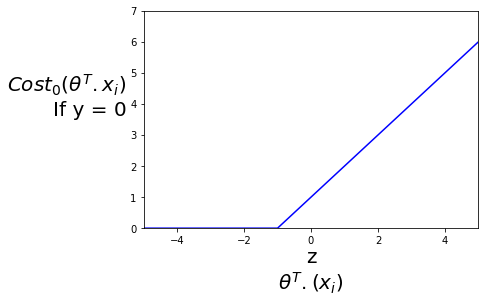

In [5]:
def costy0(x):
    y = []
    for z in x:    
        if z <= -1:
            y.append(0)
        else:
            y.append((z+1))
    return y

x = np.arange(-10,10)
y = costy0(x)
plt.plot(x, y, "b-")
plt.axis([-5,5,0,7])
plt.xlabel("z\n"+r"$\theta^T.(x_i)$",
          fontsize = 20)
plt.ylabel(r"$Cost_0(\theta^T.x_i)$"+"\nIf y = 0", rotation = 0,
           ha = "right", fontsize = 20)

__Optimisation Objective of Logistic Regression:__ 
## $ min(\theta ) \frac{1}{m} [\sum_{i=1}^{m} y^i (-log h_\theta(x))+ (1-y) (-log (1 - h_\theta(x)))] + \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_j^2 $

__Optimisation objective for SVMS:__ 
## $ min(\theta ) C [\sum_{i=1}^{m} y^i Cost_1(\theta^T.x_i)+ (1-y) Cost_0(\theta^T.x_i)] + \frac{1}{2}\sum_{j=1}^{n}\theta_j^2 $

__Changes From Opti Obj of Logistic Regression:__

- 1/m terms are removed. (does not change the minimum value of $\theta$ that you get).
    - Example: minimum value of $f(u) = (u - 5)^2$:
        - $f'(u) = 0$
        - $ 2(u-5) = 0$
        - $ u - 5 = 0, u = 5$
    - Similarly, minimum value of $ \frac{1}{m}f(u) = 1/m(u-5)^2$:
        - $\frac{1}{m}f'(u) = 0$ 
        - $\frac{2}{m}(u - 5) = 0$
        - $ u - 5 = 0, u = 5$, __again__  
    
- We had 2 terms in Logistic Regression: $ A + \lambda B$:
    - Where A was the cost function
    - and B was the regularization manner (l1 , l2) 
    - The regularisation term $\lambda$ is is just a way of parameterizing as to how much we care about minimising the cost function vs how much we care about minimising the weights. 
        - If we have big lamda, it means that we care about minimising the weights more than we want to minimise the error. (Tending to bias/underfit model).
        - If we have a small lamda, it means that we care about minimising the cost function more than we want to minimise the weights (Tending to variance/overfitting model). 
    - By setting different values for the regularization parameter $\lambda$, we could tradeoff between how well do we want to fit the data, and how well do we want to generalise (keep weights small). 
    - For the __SVM__, we are going to use set different lambda.
    - $ C A + B $
    - In logistic regression, if we had a very high $\lambda$, this meant the $B$ would get a much larger weight than $A$. 
    - Here, you can think of $C$ as $\frac{1}{\lambda}$. The lower the $C$, the higher the weight of $B$ as compared to $A$. In other words, the higher the value of $\lambda$, the higher weight $B$ gets as compared to $A$. 
    - __SO, this is just different way of parameterizing as to how much we care about minimising the cost function vs how much we care about minimising the weights.__ 
        - If we have big C, it means that we care about minimising the cost function more than we want to minimise the weights. (Tending to variance/overfitting model).
        - If we have a small C, it means that we care about minimising the weights more than we want to minimise the cost function(Tending to bias/underfitting model). 
    
__Finally: Hypothesis of SVM:__
- Not like Logistic Regression, i.e:
# $ h_\theta(x) = \hat{p} = \frac{1}{1 + e^{-\theta^TX}}$
- SVM does not output a probability. It outputs a 1 or 0 directly. 
- ## $h_{\theta}(x) = 1$ if $\theta^T(x) \geq 1 $(not just $\geq 0$) 
- ## $h_{\theta}(x) = 0$ if $\theta^T(x) \leq -1 $(not just < 0)

- 

## Large Margin Intuition: 
__1. Express the cost function for the SVM as a function of the inner product of $\theta$ and the data ($X$).__
> If y = 1: 

- If we have $y = 1$ and $\theta^T.x_i$ is $\geq 1$, we will have exactly 0 error. 
- If we have $y = 1$ and $\theta^T.x_i$ is $< 1$, we will increase the error linearly in the left, similar to the curve shown above, except it will increase linearly as $\theta^T.x_i$ tends to $-\infty$
- This function is labeled $ Cost_1(z) = Cost_1(\theta^T.x_i)$. 

> If y = 0:

- If we have $y = 0$ and $\theta^T.x_i$ is $\leq -1$, we will have exactly 0 error. 
- If we have $y = 0$ and $\theta^T.x_i$ is $> -1$, we will increase the error linearly in the right, similar to the curve shown above, except it will increase linearly as $\theta^T.x_i$ tends to $+\infty$
- This function is labeled $ Cost_0(z) = Cost_0(\theta^T.x_i)$. 

#### SVM Decision Boundary: 

__2. Show that when the parameter C is large, the SVM loss finds a decision boundary with a large margin__

Example, we set C to a very large value (eg: 100,000). If C is very very large, then while minimising the optimisation objetive: 
## $ min_{(\theta )} C [\sum_{i=1}^{m} y^i Cost_1(\theta^T.x_i)+ (1-y) Cost_0(\theta^T.x_i)] +$
## $\frac{1}{2}\sum_{j=1}^{n}\theta_j^2 $

- We are going to be very motivated to such $\theta$s that make the cost function == 0. In other words, there should be close to error after the optimisation. 
    - But then, we have the regularization term also? 
- What would it take for the cost function to be equal to 0 ? 
    - If the class y = 1, then we want that $\theta^T(x^i)$ be >= 1.
    - If y = 0, then we want that $\theta^T(x^i)$ be <= -1.
- Then we are going to be left to : 
## $ min_{(\theta )} C \times 0 + \frac{1}{2}\sum_{j=1}^{n}\theta_j^2 $
- It truns out that we minimise this function to obtain the parameter vector/matrix $\theta$, we get a very interesting decision boundary. 
- Concretetly, if there is a dataset that is linearly seperable having positive and negative examples. 
- The SVM will find the best(__black one below__) decision boundary ( The boundary with the largest margin and that is a consequence of the minimisation objective we have written above). 
<img src="images/SVMS_coursera/SVMDecisionBoundary_LinearlySeperableCase.png"> 

__Udacity: The Best Line: __ 
- The above 5-6 lines, all seperate the data. But the black line is the best line. Why? 
    - What is the problem with the magenta line? 
    - What is the problem with the blue lines? 
    - What are the problems that you might run into ig you put one line very close to the positives or a line very close to the negatives? 
         - Okay, maybe they fit this data. But this is just a sample from the population. 
         - You do not want to believe the sample/training data too much. 
         - Though you want to learn the data, you do not want to memorise it. That's overfitting.  
         - The __black line__(best line) is the line that is consistent to the data, while committing least to the training data. 
         - Note that, till now, we we refer to overfitting as increasing the complexity of the model. But in SVMs, among these lines, there is no different "model complexity" between the magenta/blue/black line. They're all still lines.     

__Udacity: SVM: __  

__Some Notation:__ 
- The equation of a line/decision boundary is __$ y = mx + b$__ 
- In terms of machine learning: __ $y = \theta^T.x + b $__
- Note that $y$ is not the same in the above 2 equations. 
    - In the first equation $y = mx + b$, $y$ refers to the $y - dimension$  of the plane. 
    - In the second equation: $y = \theta^T.x + b $ , $y$ refers to the classification score. 
- The output $y$ is going to be a value that indicates whether you are in the positive class or negative class. 
- $\theta$ represents the parameters for our hyperplane/line.
- and $b / \theta_0$ is what moves the line/hyperplane in and out of the origin, is also part of the $\theta vector$
- This is what our linear classifiers look like, even in multiple dimensions with hyperplanes. 

__Now,__ we know that we want to find the line that best seperates the positive points from the negative points with the largest margin. 
- The equation of the decision boundary in multi dimesnions is $y = \theta^T.x + b $
- __Q: What would be the output of this classifier for any $x$ lying on the decision boundary $y = \theta^T.x + b $? __ 
    - Ans: The decision boundary is the place where the classifier is not sure whether the example is in the positive class or in the negative class. This means that our decison score should neither be positve, nor negative. 
    - Therefore $\theta^T.x + b$ needs to be $ = 0 $ for any point $x$ on the line. 
- Therefore, correction. The equation of the decision boundary in multi dimesnions is $\theta^T.x + b = 0$

- __Q. What is the equation for the other blue lines that  are right at our positive and negative examples?__ 
    - Lets say $ y \in [-1, +1]$
    -We want the output of line that _brushes up against_ / _goes thorugh the positive examples to be $+1$ at the  points that it encounters aty the decision boundary (in the positive region)
    - This makes sense. This way, the examples that are past the line and into the positive region will have a value($\theta^T.x + b $) above 1. 
    - The examples that are brush up against/on the decision boundary will have value $\theta^T.x + b  = 1$. 
    - The examples that are before the line (in that demilitarized zone) will have value between 0 and 1. 
- Therefore, a line/hyperplane that brushes up against the positive examples will have the equation $\theta^T.x + b = 1$
- By similar argument, we can conclude that a line/hyperplane that brushes up against the negative examples will have the equation $\theta^T.x + b = -1$.

- __So, We know:__
    - The eqution of the hyperplane is $\theta^T.x + b = 0$.
    - If we slid that line towards th positive values, we will end up with $\theta^T.x + b = 1$. 
    - and if we slid the line towards the negative examples, we will end up with $\theta^T.x + b = -1$.   
    
<img src="images/svm/svm.png">  

- __How does this help us? __
    - We want our decision boundary to be as far from the positive and negative examples as possible. 
    - This means that the distance between $\theta^T.x + b = 1$ (the blue lines) and  $\theta^T.x + b = -1$, (_which are parallel to the decision boundary_) needs to be maximum.
    - How are we going to figure out the distance between them? 
        - The lines are parallel to each other. 
        - We can pick 2 points (_support vectors: x1 and x2_) , one of each of the lines such that, when you draw a line between them, that line will be perpedicular to both:
            -  $\theta^T.x + b = 1$ 
            - and $\theta^T.x + b = -1$
    - The vector that is defined by the distance  between x1 and x2 is going to have the length that tells you how far apart the lines are. 
    - Once we get this vector of distance, it will tell us how far your boundary decision line is from the data (which we want to be maximum). 

- __Now, what is the distance between the 2 planes in terms of $\theta$?__     
    - This difference between the 2 equations is: 
        - # $\theta^T(x^1 - x^2) = 2$ 
    - But what is the distance between x1 and x2? 
        - Simple, that is ||x1 - x2||
        - That is correct. But we want the distance in terms of the weight vector. Why? 
            - Cause the only thing we can alter is the weight vector. 
            - In order for the distance between x1 and x2 to be maximal, we want to play with the weight vector in order to alter the distance between the x1 and x2. 
     - Dviding the above equation by the norm of the weight vector: 
         - ## $\frac{\theta^T}{||\theta||}(x^1 - x^2) = \frac{2}{||\theta||}$ 
    - According to the lecture: $\frac{\theta^T}{||\theta||}(x^1 - x^2)$ is the length of the projection of the vector: $(x^1 - x^2)$ onto the weight vector. This is what signifies the margin $m$. 
    - Now, the margin $m = \frac{2}{||\theta||}$. This means, in order to maximise the margin, we need to minimise the norm of the weight vector.
    - If we push all the weights to 0, we will not be able to correctly classify our points. 
    - __ We want to find the parameters of the hyperplane such that  we maximse the $ \frac{2}{||\theta||}$ while still correctly classifying the points. __ 

DOUBT: What does maximising the margin even mean? What is the process of maximising the margin?  Won't the distance between the 2 points always be the same? Does maximising the distance between the 2 blue lines means, finding the right support vectors so that we maximise the distance while creating the least errors?  

Because the distance between 2 support vectors cannot change. 

The only things that will change the distance between the 2 blue lines is choosing the right support vectors.

__AIM:__  
- ### max $\frac{2}{||\theta||}$ while __classifying everything correctly__ . 
- ### max $\frac{2}{||\theta||}$ while __$y^i(\theta^T.x^i + b) \geq 1$__ 
    - This the  hinge loss function. 
- This is the same as saying: 
    -  ### min $\frac{1}{2}||\theta||^2$ while __$y^i(\theta^T.x^i + b) \geq 1$__ 
    - Here, we took the reciprocal of $\frac{2}{||\theta||}$, which means we will have to put a min infront of the equation instead of a max. 
    - The squaring is....i don't know why. DOUBT: What does the instructor mean by its makes it monotone. 
- __Now, the question is, why is minimising  $\frac{1}{2}||\theta||^2$ easier than maximising $\frac{2}{||\theta||}$? __ 
    - When you have such a problem, minimising a theta norm, subject to certain constaints: It is a quadratic programming problem. 
    - Now, the important thing to know here is that we have defined a optimisation problem and there are known techniques that come from linear algebra that tell us how to solve them.  
    

- Now, we can convert this into the dual problem which is solvable by quadratic programing: 
- ### $min_{\alpha}\frac{1}{2}\sum_{i=1}^{m}\sum_{j=1}^{m}\alpha^i.\alpha^j.y^i.y^j.{x^i}^T.x^j - \sum_{i=1}^{m}\alpha^i$ 
- ## subject to : $\alpha^i \geq 0$
- ### What this says: 
    - __Find all pair of points__, 
    - __Figure out which ones matter to define your decision boundary (alpha will __not__ be 0 if $y^i(w^Tx^i) = 1$, otherwise will be 0)__  
    - __And think about how they relate to one another in terms of their output ($y^i.y^j$) with respect to how similar they are with one another($(x^i)^T.x^j$)__  
- #### where:
    - ### $\frac{1}{2}\sum_{i=1}^{m}\sum_{j=1}^{m}\alpha^i.\alpha^j.y^i.y^j.{x^i}^T.x^j$ replaces $\frac{1}{2}w^T.w$ as :
        - ## __w__ = $ \sum_{i=1}^m \hat{\alpha}^i y^i x^i$
- #### and: 
    - ### $\sum_{i=1}^{m}\alpha^i $ replaces $- \sum_{i=1}^m\alpha^i(y^i(w^T.x^i + b) - 1)$ as:
        - ## $ - \sum_{i=1}^m \hat{\alpha}^i y^i = 0 $ 
        
- Once you find the vector $\hat{a}$ that minimises this equation (using the QP solver) , you can computer __w__ and __b__ that minimise the primal problem by the following equation: 
    - ## __$w$__ = $ \sum_{i=1}^m \hat{\alpha}^i y^i x^i$
    - ## __$b$__ = $\frac{1}{n_s}\sum_{i=1}^m[1 - y^i(w^T.x^i)]$ subject to $\hat{a}^i > 0$  

__Udacity: Some other interesting properties of the dual problem: __   
- It turns out that most of the alphas are going to 0.(this is one of the conditions of KKT, read)  
- __Now, if i tell you that most of the alphas are 0s, what does that tell you about w? __ 
    - If the alpha is 0. Then if alpha is 0 for most of the data points. Then a bunch of the data does not factor into the __w__. 
    - Therefore, some of the datapoints (vectors) matter to find the solution (__w__) and some will not. 
    - So, basically you build a machine that needs a few support vectors. 
    - Therefore, only a few instances matter.  
    - Therefore, the x's(instances) that are far away from the decision boundary and cannot define the contours of the decision boundary, do not matter. They will have an alpha =0. And will not affect the weight vector. 
- Note that the only time we use instances in the above equation is when we take the dot product of the pair of instance features: $(x^i)^T.x^j$, which basically tells us __how similar they are__:
    - DOUBT: How is $(x^i)^T.x^j$, equivalent to the length of the projection of $x^j$ onto $x^i$ 
    https://www.mathsisfun.com/algebra/vectors-dot-product.html
    https://math.stackexchange.com/questions/805954/what-does-the-dot-product-of-two-vectors-represent
    https://math.stackexchange.com/questions/1321964/geometric-interpretation-of-the-dot-product
    - If they are orthogonal to each other, you'll get a 0. 
    - If they are in opposite directions to each other, you'll get a -negative number. 
    - If they are in the same direction, you'll get a positive number. 

__3. Explain how parameter C plays a role similar to the regularization parameter (lamda) and helps to account for outliers. __ 

- If C is very large, it means that:
    - More weight is given to the Cost Function than the regularisation term.
    - The optimisation objective would be to penalise(make small) the cost function more than the regularisation parameter. 
    - Therefore, the SVM would not like any errros, even if it does overfit the data. 
    - In the following case, the SVM should classify the points using the black line, but in th presense of outliers, it will try to overfit/ get least error. This is why it will try to fit the mageneta line. 

- On the other hand, if C is small, it means that:
    - More weight is given to the regularisation term than the cost function. 
    - The optimisation objective would be to penalise(make small) the weights more than the cost function.
    - Therefore the SVM would be fine getting some errors, as long as the weights are small enoguh. 

<img src="images/SVMS_coursera/Outliers.png"> 


__We should look to find the best tradeoff value of C, that fits the data well(causing few errors), and does not have large weights.__   
> __like the black line above__

__In other words, we should find a tradeoff value of C, that creates the least error and highest margin as possible while generalising well to new points. __  

# The Mathematics Behind Large Margin Classifiers: 

## __Why does the optimisation objective:__ 
### $ min_{(\theta )} C [\sum_{i=1}^{m} y^i Cost_1(\theta^T.x_i)+ (1-y) Cost_0(\theta^T.x_i)] +$
### $\frac{1}{2}\sum_{j=1}^{n}\theta_j^2 $
## __when C is very large: __
### $ min_{(\theta )} C \times 0 + \frac{1}{2}\sum_{j=1}^{n}\theta_j^2 $
## __give a large marigin classifier?__ 

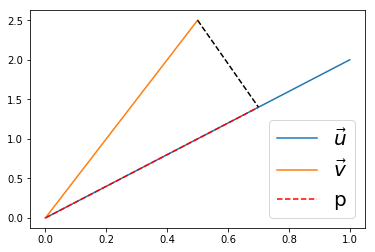

In [6]:
u = np.array([1,2])
v = np.array([0.5,2.5])

plt.plot([0,u[0]], [0,u[1]], label = r"$\vec{u}$")
plt.plot([0,v[0]], [0,v[1]], label = r"$\vec{v}$")
plt.plot([v[0],0.7],[v[1],1.4], "k--", )
plt.plot([0,0.7],[0,1.4], "r--", label = r"p",)
plt.legend(fontsize = 20)

# $||u||$ = length of the vector u = $\sqrt{u_1^2 + u_2^2}$

### p is the length/ magnitude of the projection of $\vec{v}$ onto $\vec{u}$.

- Note that p is signed. If the angle between vector u and vector v is more than 90, p will be negative. Otherwise, p will be positive. 
    - Hint: $cos\theta$ is negative in 2nd and 3rd quadrant. Therefore, the dot product will be negative. 
- [DOUBT](https://www.quora.com/Can-scalar-projection-be-negative): [How can magnitude be a negative value](https://math.stackexchange.com/questions/1315210/could-the-scalar-projection-be-negative)? 

- The projection of a vector v onto another vector u is given by the formula: 
    - $\textbf{proj}_{\textbf{u}}{\textbf{v}} = (\textbf{v} \cdot \hat{\textbf{u}}) \times \hat{\textbf{u}}$
        - Dot product of __v__ and normalized __u__, multiplied by normalized __u__. 

In [7]:
norm_u = np.linalg.norm(u)
u_normalised = u/norm_u
vec_p = v.dot(u_normalised)*u_normalised
vec_p
# >> array([ 1.1,  2.2])

array([ 1.1,  2.2])

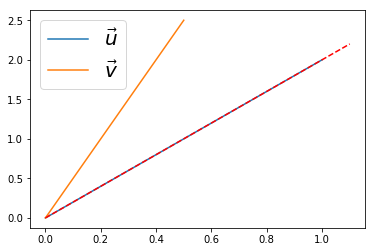

In [8]:
u = np.array([1,2])
v = np.array([0.5,2.5])

plt.plot([0,u[0]], [0,u[1]], label = r"$\vec{u}$")
plt.plot([0,v[0]], [0,v[1]], label = r"$\vec{v}$")
# plt.plot([v[0],0.7],[v[1],1.4], "k--", )
# plt.plot([0,0.7],[0,1.4], "r--", label = r"p",)
plt.plot([0,vec_p[0]],[0,vec_p[1]], "r--")
plt.legend(fontsize = 20)

In [9]:
p = np.linalg.norm(vec_p)
p

2.459674775249769

- ### It's possible to show that the inner product, $\vec{u}^T.\vec{v} = p.||u||$  ( 1 way of figuring out the inner product ) , will be a Real Number. 
- If you actually figure out the geometry and get to know what the norm of u is, what p is, you will find out that:

### $\vec{u}^T.\vec{v}$ is also equal to: $ u_1*v_1 + u_2*v_2 $ , will be a Real Number. 
- Note that: $\vec{u}^T.\vec{v} = \vec{v}^T.\vec{u}$
- Note that: the dot product can be both negative or positive as p is signed. 

In [10]:
np.dot(u,v) 

5.5

In [11]:
np.ceil(np.dot(u,v))

6.0

In [12]:
p*norm_u

5.5000000000000009

In [13]:
np.ceil(p*norm_u) 

6.0

In [14]:
np.ceil(np.dot(u,v)) == np.ceil(p*norm_u) 

True

### p is the length/ magnitude of the projection of $\vec{v}$ onto $\vec{u}$.

- Note that p is signed. If the angle between vector u and vector v is more than 90, p will be negative. Otherwise, p will be positive. 
    - Hint: $cos\theta$ is negative in 2nd and 3rd quadrant. Therefore, the dot product will be negative. 
- [DOUBT](https://www.quora.com/Can-scalar-projection-be-negative): [How can magnitude be a negative value](https://math.stackexchange.com/questions/1315210/could-the-scalar-projection-be-negative)? 
__seeing what happens when angle between $\vec{u}, \vec{v}$ is more than 90__

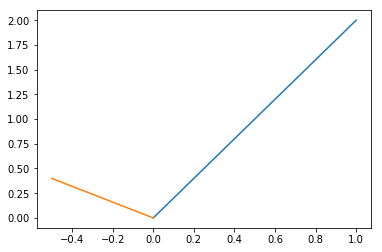

In [15]:
u = np.array([1,2])
v = np.array([-0.5,0.4])

plt.plot([0,u[0]], [0,u[1]], label = r"$\vec{u}$")
plt.plot([0,v[0]], [0,v[1]], label = r"$\vec{v}$")
# plt.plot([v[0],0.7],[v[1],1.4], "k--", )
# plt.plot([0,0.7],[0,1.4], "r--", label = r"p",)


In [16]:
u_normalised = u/np.linalg.norm(u)
u_normalised

array([ 0.4472136 ,  0.89442719])

In [17]:
neg_vec_p = v.dot(u_normalised)*u_normalised
neg_vec_p

array([ 0.06,  0.12])

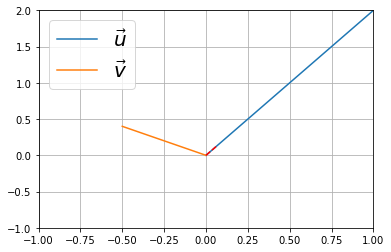

In [18]:
plt.plot([0,u[0]], [0,u[1]], label = r"$\vec{u}$")
plt.plot([0,v[0]], [0,v[1]], label = r"$\vec{v}$")
plt.plot([0,neg_vec_p[0]],[0,neg_vec_p[1]], "r--")
plt.legend(fontsize = 20)
plt.axis([-1,1,-1,2])
plt.grid()

In [19]:
#Confirming u.v == p*||u||, given vec_p is the projection
# of v on u
np.dot(u,v) == np.linalg.norm(neg_vec_p)*np.linalg.norm(u)

True

DOUBTS: 
- magnitude of vectors 

- [projection of one vector over the other](https://www.khanacademy.org/math/linear-algebra/matrix-transformations/lin-trans-examples/v/introduction-to-projections)
    - For a line going through the origin, we can define a vector going through the line, such that L = { c$\vec{v}$ | c $\in$ R } . 
    - $Proj_L(\vec{x}$ is referred to as the projection of the cvector x onto the line L. 
    - Lets say you have a light source that is perpendicular to the line (the vector _onto_ which you're projecting. Like the sun perpedicular to the line.
    - The projection would be the shadow of the vector x onto the line. 
    - The magnitude of vector x is not equal to the magintude of the projection. 
    - How to calculate this shadow vector? 
    - How to calculate this projected vector? 
    - Note that: Perpendicular Line joining $\vec{x}$'s tip to $proj_L\vec{x}$'s tip $ + proj_L\vec{x}  = \vec{x}$ 
    - Therefore the Perpendicular Line joining $\vec{x}$'s tip to $proj_L\vec{x}$'s tip $ = \vec{x} - proj_L\vec{x}$. 
    - __$proj_L\vec{x}$ = Some Vector that is in L(part of L) where $ \vec{x} - proj_L\vec{x}$ is orthogonal to L. __
    - Therefore $proj_L\vec{x} = c\vec{v}$
    - Therefore, $proj_L\vec{x} = c\vec{v}$ such that $ \vec{x} - proj_L\vec{x}$ or $\vec{x} - c\vec{v}$ is orthogoal to L. 
    - We know that if one vector is orthogonal to another vector, their dot product is 0. 
    - Here, the vector: $\vec{x} - c\vec{v}$ and the line L are perpendicular to each other. 
    - In other words, $\vec{x} - c\vec{v}$ is perpedicular to any vector in L. 
    - Therefore,  $\vec{x} - c\vec{v}$ is perpedicular to  $\vec{v}$ 
    - Therefore:  $(\vec{x} - c\vec{v}).\vec{v} = 0$
    -Distributive property: 
        - $\vec{x}.\vec{v} - c\vec{v}\vec{v} = 0$
        - Adding $c\vec{v}\vec{v}$ to both sides: 
        - $\vec{x}.\vec{v} = c.\vec{v}.\vec{v}$
        - $\frac{\vec{x}.\vec{v}}{\vec{v}.\vec{v}} = c$
  
- Now, as noted: $proj_L\vec{x} = c\vec{v}$
    - # $proj_L\vec{x} = \frac{\vec{x}.\vec{v}}{\vec{v}.\vec{v}}\vec{v}$ where $\frac{\vec{x}.\vec{v}}{\vec{v}.\vec{v}}$ is the scaling factor(a number). 

- inner/dot product geometric interpretations([https://www.mathsisfun.com/algebra/vectors-dot-product.html]) 
- is there a difference between inner and dot products? 
     - No. 
- [DOUBT](https://www.quora.com/Can-scalar-projection-be-negative): [How can magnitude be a negative value](https://math.stackexchange.com/questions/1315210/could-the-scalar-projection-be-negative)? 

Now, suppose we have a very big C. From previous discussions we know that when C is very big, out optimisation objective is: 
## $ min_{(\theta )}\frac{1}{2}\sum_{j=1}^{n}\theta_j^2 $
### subject to: 
- ### $\theta^T(x^i) >= 1 $ wherever y = 1.
- ### $\theta^T(x^i) <= -1$ wherever y = 0.


#### Some assumptions: 
- No intercepts, $\theta_0 = 0$
- The number of features $n = 2$. 

Therefore, the minimisation objective is: 
## $ min_{(\theta )}\frac{1}{2}(\theta_1^2 + \theta_2^2) $
## = $ min_{(\theta)}\frac{1}{2}{[\sqrt{\theta_1^2 + \theta_2^2}]}^2 $
## = $ min_{(\theta)}\frac{1}{2}{(length-of-\theta-vector)}^2 $
## = $ min_{(\theta)}\frac{1}{2}[{||\theta||}]^2 $
- __Therefore, the optimisation objective is just to minimise the squared norm/ squared length of parameter vector $\theta$.__ 

In [20]:
# x_i_1 = 3
# x_i_2 = 5
# x_i = np.array([x_i_1, x_i_2])

# theta_1 = 5
# theta_2 = 2
# theta = np.array([theta_1, theta_2])

# plt.plot(x_i_1, x_i_2, "rx")
# plt.arrow(0, 0, theta[0], theta[1],head_width=0.2,
#           head_length=0.1, length_includes_head=True,
#          color = "b", alpha = 0.8, label = r"$\vec{\theta}$")

# plt.arrow(0, 0, x_i[0], x_i[1],head_width=0.2,
#           head_length=0.3, length_includes_head=True,
#          color = "g", label = r"$\vec{x_i}$")

# plt.plot([3.6, 3],[1.4,5], "k--", )
# plt.plot([0,3.6],[0,1.4], "r--", label = "p")
# plt.axis([0,6,0,6])
# plt.legend()

## Plotting the input and parameter vector in 2d space: 

[0, 6, 0, 6]

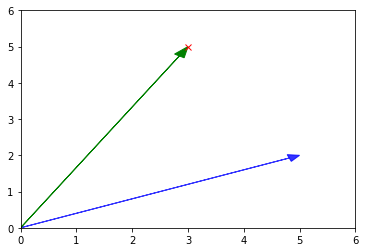

In [21]:
x_i_1 = 3
x_i_2 = 5
x_i = np.array([x_i_1, x_i_2])

theta_1 = 5
theta_2 = 2
theta = np.array([theta_1, theta_2])

plt.plot(x_i_1, x_i_2, "rx")
plt.arrow(0, 0, theta[0], theta[1],head_width=0.2,
          head_length=0.2, length_includes_head=True,
         color = "b", alpha = 0.8, label = r"$\vec{\theta}$")

plt.arrow(0, 0, x_i[0], x_i[1],head_width=0.2,
          head_length=0.3, length_includes_head=True,
         color = "g", label = r"$\vec{x_i}$")
plt.axis([0,6,0,6])

In [22]:
# Finding the magnitude of parameter vector
theta_norm = np.linalg.norm(theta)
theta_norm

5.3851648071345037

In [23]:
# Normailising the parameter vector
theta_normalised = theta/theta_norm
theta_normalised

array([ 0.92847669,  0.37139068])

### The following figure shows the normalised_theta: 

[0, 6, 0, 6]

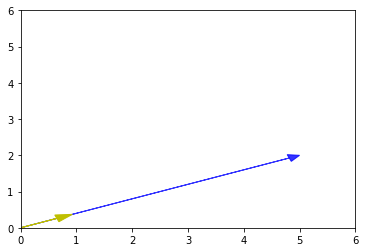

In [24]:
plt.arrow(0, 0, theta[0], theta[1],head_width=0.2,
          head_length=0.2, length_includes_head=True,
         color = "b", alpha = 0.8, label = r"$\vec{\theta}$")

plt.arrow(0,0,theta_normalised[0],theta_normalised[1],
         head_width=0.2,head_length=0.3, length_includes_head=True,
         color = "y", label = r"$\vec{x_i}$")
plt.axis([0,6,0,6])

In [25]:
# Finding the projection of input vector onto the 
# parameter vector
vec_p = x_i.dot(theta_normalised)*theta_normalised
vec_p

array([ 4.31034483,  1.72413793])

[0, 6, 0, 6]

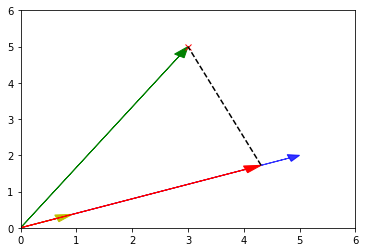

In [26]:
# Input point
plt.plot(x_i_1, x_i_2, "rx")

# Input vector
plt.arrow(0, 0, x_i[0], x_i[1],head_width=0.2,
          head_length=0.3, length_includes_head=True,
         color = "g", label = r"$\vec{x_i}$")

# Parameter Vector
plt.arrow(0, 0, theta[0], theta[1],head_width=0.2,
          head_length=0.2, length_includes_head=True,
         color = "b", alpha = 0.8, label = r"$\vec{\theta}$")

# Normalised Parameter Vector
plt.arrow(0,0,theta_normalised[0],theta_normalised[1],
         head_width=0.2,head_length=0.3, length_includes_head=True,
         color = "y", label = r"$\vec{x_i}$")

# Projection of input vector onto the parameter vector
plt.arrow(0,0,vec_p[0],vec_p[1],
         head_width=0.2,head_length=0.3, length_includes_head=True,
         color = "r", label = r"$\vec{x_i}$")

plt.plot([vec_p[0],x_i[0]],[vec_p[1],x_i[1]],"k--")

plt.axis([0,6,0,6])

### Finding p: The magnitude of the projection of $x_i$, the input vector onto $\theta$, the parameter vector. 

In [27]:
vec_p

array([ 4.31034483,  1.72413793])

In [28]:
p = np.linalg.norm(vec_p)
p

4.6423834544262972

### Confirming: $\theta^T.x_i == p*||\theta||$

In [29]:
np.dot(x_i,theta)

25

In [30]:
theta_norm

5.3851648071345037

In [31]:
p*theta_norm

25.000000000000004

### p is the length/ magnitude of the projection of $\vec{x_i}$ onto $\vec{\theta}$.

## $\theta^T.x_i = p^i||\theta||$
## $\theta^T.x_i = \theta_1*x_1^i + \theta_2*x_2^i $

- Since the above is found, we can to replace our conditions of our optimisation object which were: 
- ### $\theta^T(x^i) >= 1 $ wherever y = 1.
- ### $\theta^T(x^i) <= -1$ wherever y = 0.
- By: 
## $ min_{(\theta )}\frac{1}{2}\sum_{j=1}^{n}\theta_j^2 = min_{(\theta)}\frac{1}{2}[{||\theta||}]^2 $
### subject to: 
- ### $p^i||\theta|| >= 1 $ wherever y = 1.
- ### $p^i||\theta|| <= -1$ wherever y = 0.
- where $p^i$ is the magnitude of the projection of $x^i$ onto the vector $\theta$. (assuming $\theta_0 = 0$)

### Summary (uptill now): 
- In summary, the minimisation objective is to minimise the squared norm or squared length of the parameter vector theta, on the folowing conditions: 
    - The product of the:
        - magnitude of the projection of input vector $x_i$ onto the parameter vector $\theta$
        - and the 
        - length of the parameter vector $||\theta||$
        - will be >= 1 if y = 1, else 
        - will be <= -1 if y = 0. 
    

    
- DOUBT: Why is the $\vec{\theta}$ perpendicular to the decision boundary?   
    - Think about the decision boundary as a demarkation line. On one side of which lie positive examples, and on the other side, lie negative examples. 
    - On this very line the examples may be classified as positive or negative. 
    - We know the the cost of SVM is a function of dot product of theta and the example vectors. 
    - The examples may have positive or negative projections on theta depending on the kibnd they are.
    - These projection on theta must be equal to 0 for any point lying on the decision boundary. Otherwise, the example can be classified as postive or negative. 
    - This is only possible for the line that's perpendincular to the theta vector.
    - Similar to the fact that no shadow (projection) is formed when the Sun(theta vector) is directly overhead. 
- Intuitively, If you want to project an input vector(which lies on the decision boundary) onto the parameter vector (theta). You needs to take a 90 degree projection of input vector onto the parameter vector. This will make you return to the origin. Therefore, the magnitude of the projection will be 0. 

In [32]:
theta = np.array([5,0]) # Parameter Vector 
d_b = np.array([0,10]) # Decision Boundary

[-1, 6, -1, 6]

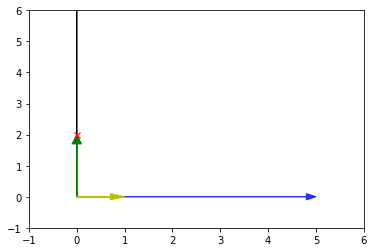

In [33]:
# Decision Boundary
plt.arrow(0, 0, d_b[0], d_b[1],head_width=0.2,
          head_length=0.3, length_includes_head=True,
         color = "k", label = r"$\vec{x_i}$")

# Parameter Vector
plt.arrow(0, 0, theta[0], theta[1],head_width=0.2,
          head_length=0.2, length_includes_head=True,
         color = "b", alpha = 0.8, label = r"$\vec{\theta}$")

# Input Point:
plt.plot([0],[2],"rx")

# Input Vector Perpendicular to Parameter Vector 
x_i = np.array([0,2])
plt.arrow(0, 0, x_i[0], x_i[1],head_width=0.2,
          head_length=0.3, length_includes_head=True,
         color = "g", label = r"$\vec{x_i}$")

theta_normalised = theta/np.linalg.norm(theta)
# >> array([ 1.,  0.])

plt.arrow(0, 0, theta_normalised[0], theta_normalised[1],head_width=0.2,
          head_length=0.3, length_includes_head=True,
         color = "y", label = r"$\vec{x_i}$")

plt.axis([-1,6,-1,6])

### Calculating $\theta^T.x_i$, needs to be 0 (belonging to neither class , as the point lies on the decision boundary. 

In [34]:
theta_transpose_x = theta.T.dot(x_i)
theta_transpose_x

0

### Finding the projection of the input vector onto the parameter vector: 

In [35]:
vec_p = x_i.dot(theta_normalised)*theta_normalised
vec_p

array([ 0.,  0.])

### Calculating the magnitude of the projection of the input vector onto the parameter vector: 
- Needs to be 0, as the magnitude of the projection is equivalent to the distance of the input vector from the decision boundary. 

In [36]:
p = np.linalg.norm(vec_p)
p

0.0

# The above proves why theta needs to be perpendicular to the decision boundary. 
- Because a point on the decision boundary needs to be 0 distance from the decision boundary.
- In other words, the projection of the input vector (on the decision boundary) onto the parameter vector(theta) need to have a magnitude of 0. 
- This is only possibe when the parameter vector is perpedicular to the decision boundary.

DOUBT - Did not understand why ||theta|| is to be 1/2? 

- Because of the optimisation objective being to minimise $||\theta||^2$, it is esential that $||\theta||$ is also to be small. 
- Since, $||\theta||$  needs to be small, indirectly, the model will try to maximise $ p^i$, which is the magnitude of the projection of input vector on the parameter vector. 
    - Why? 

    - The product of $p^i$ and $||\theta||$ needs to be equal to >= 1, if y = 1.
        - Therefore, $||\theta||$ needs to be large if $p^i$ is a small positive number.
        - Therefore, $||\theta||$ can be small if $p^i$ is a big positive number. 
    - The product of $p^i$ and $||\theta||$ needs to be equal to <= -1, if y = 0. 
        - Therefore, $||\theta||$ needs to be large if $p^i$ is a small negative number. 
        - Therefore, $||\theta||$can be small if $p^i$ is a big negative number.  
    
- $p^i$, in another way is the distance of the decision boundary from any of the points. To increase the margin, we need to increase $p^i$, which is what ourt model does. 
- The bigger the distance of points from the decision boundary($p^i$), the smaller $||\theta||$ can be.  

dacit

# Kernels: 

- Start adapting SVMs in order to develop complex non linear classifiers. 
- On way is to come up with a set of complex poynomial features. For eg: $\theta_1x_1 + \theta_2x_2 + \theta_3x_1x_2 + \theta_4x_1^2 + \theta_5x_2^2 + ....$, such that :
## $h_\theta(x) = 1 if \theta_1x_1 + \theta_2x_2 + ... \geq 0$ 
## $h_\theta(x) = 0 if \theta_1x_1 + \theta_2x_2 + ... < 0$    
- New Notation: We can think of:
    - $x_1 = f_1$
    - $x_2 = f_2$
    - $x_1x_2 = f_3$
    - $x_1^2 = f_4$
    - $x_2^2 = f_5$
- We can think of a hypothesis as computing a decison boundary: $\theta_1f_1 + \theta_2f_2 + \theta_3f_3 + \theta_4f_4 + \theta_5f_5  + ....$ 

__1. Recognise kernels are similarity functions__

- __Is there a different/better choice of features than high order polynomials?__
    - Its not cear that high order polynomial is what we want.
     - Using high order polynomial terms becomes very expensive sometimes. For eg: In the case of computer vision, each pixel is a feature. 

- Lets take an example. Suppose we have only 2 features, x_1 and x_2. 
- We are going to define 3 new features from x_1 and x_2 by manually choosing random points (__landmarks__) on a graph of x_1 vs x_2.
<img src="images/SVMS_coursera/landmarks.png">  
- Now, given $x =[x_1, x_2]$, we are going to define $f_1$ as a similarity measure $(x, l^1), (x, l^2), (x, l^3)$
- How are we going to define the similarity between them? 
    - # $Similarity(x, l^i) = e^{-\frac{||x - l^i||^2}{2\sigma^2}}$
    - ### $||x - l^i||^2$ is the squared distance between the 2 vectors $x$ and $l^i$.
    - It can also be component wise distance squared: 
    - # $K(x, l^i) = e^{-\frac{\sum_{j=1}^n(x_j - l_j^i)^2}{2\sigma^2}}$

__2. Describing the behavior of gaussian kernel when examples are close to or fat from each other__:   

- Supose $x$ is close to $l^i$: 
     - # $f_1 = K(x, l^i) \approx e^{-\frac{(0)^2}{2\sigma^2}} \approx e^0 \approx 1$  

- Conversely, if $x$ is far from $l^i$: 
     - ## $f_1 = K(x, l^i) \approx e^{-\frac{(\infty)^2}{2\sigma^2}} \approx e^{-\infty} \approx 0$
     
     
     
- What these features($f_1, f_2, f_3$) do is see how similar your feature vector $x$ is from one of your landamarks $l^i$. 
- The feature $\approx$ 1, when your feature vector is close to your landmark.
- The feature $\approx$ 0, when your feature vector is far from your landmark. 
- Each landmark defines a new feature. For every $l^i$, there is a $f_i$. 

__Plotting (f1 vs x_1,x_2) supposing that out $l^i = [3,5]$, where x_1 and x_2 are components/features and :__
- # $ f_1 = e^{-\frac{||x - l^i||^2}{2\sigma^2}}$ 
- Here, we have variance / $\sigma^2 = 1$, which a parameter for the Gaussian Kernel: It decides how rapidly the similarity measure will change. 
<img src="images/SVMS_coursera/kernel_var_1.png">  
 
   
- The bigger the variance, the smaller is the negative number raised to $e$. 
- For eg:
    - $e^{-1000} = 0$
    - $e^{-10} = 0.00004$
    - $e^{-1} = 0.36$
    - $e^{-0.1} = 0.90$
- As variance increases, the similarity score tends to 1. Here, variance = 3.  
<img src="images/SVMS_coursera/kernel_var_3.png">  

> - As the __variance increases__, the similarity score __falls to 0 much more slowly__. 
> - The bigger the variance, the more difficult it is to get a score of 0(very different). 
> - Or, the more easier it is to get a score of 1 (same). 
> - Gives a __high bias/ lower variance/ underfitting__ model. 


- As variance decreases, the similarity score tends to 0. Here, varince = 0.5. 
<img src="images/SVMS_coursera/kernel_var_0.5.png">  

> - As the __variance decreases__, the similarity score __falls to 0 much more rapidy__. 
> - The less the variance, the more difficult it is to get a score if 1(same).
> - Or the more easier it is to get a score of 0(very different). 
> - Gives a __high variance/ lower bias/ overfitting__ model. 

- Note that $e^{-x}$ is a function that ranges from 0 to infinity (Always positive), but because of the nature of $x = \frac{||x - l^i||^2}{2\sigma^2}$, it can either result into:
- $e^0 = 1$ where $x$ and $l^i$ are same, or
- $e^{-(LargeNumber)} == 0$ where $x$ and $l^i$ are very different. 
- DOUBT Therefore $K(x, l^i$ will always lie between 0 and 1. 
    


- __NOTE:__
    - When $x_1 = 3$ and $x_2 = 5$ ,we get $f1 = 1$, that is the similarity score. 
    - As x moves away from $[3,5]$, we get a smaller $f1 \approx 0$ , that is the similarity score. 

__Given these definitions of features, lets see what sorts of hypothesis can we learn ... __

__3. Show that the features based on a kernel can result in a non-linear decision boundary__:  


Example: 
- Given a training example, $x$ we predict "1" when:
   - # $\theta_0 + \theta_1f_1 + \theta_2f_2 + \theta_3f_3 >= 0 $
- For our example, let's say we already run an algorithm and got that: 
    - $\theta_0 = -0.5 $
    - $\theta_1 = 1 $
    - $\theta_2 = 1 $
    - $\theta_3 = 0 $
- Given our placement of three landmarks, what happens if we evaluate an example at the __magenta__ dot below? 
<img src="images/SVMS_coursera/x_i_close_to_l_1.png">
- Looking at our formula, we know that:
    - $f1 \approx 1$
    - $f2 \approx 0$
    - $f3 \approx 0$
    - y = 1 if $ = \theta_0 + \theta_1f_1 + \theta_2f_2 + \theta_3f_3 >= 0 $
    - $ -0.5 + 1*1 + 1*0 + 0*0 = 0.5 \geq 0$
    - Therefore, we predict 1. 
- Now, what about the __cyan__ dot below? 
<img src="images/SVMS_coursera/x_i_close_to_none.png">
- This is not close to any of the landmarks, therefore $f_1, f_2, f_3 \approx 0 $. 
- y = 1 if $ = \theta_0 + \theta_1f_1 + \theta_2f_2 + \theta_3f_3 >= 0 $
- $ = -0.5 + 0 + 0 + 0 = -0.5 < 0$
- Therefore, we predict 0. 

__In Conclusion:__   
- Considering our parameters for points near $l^1$ and $l^2$, you predict 1, as $\theta_1 = \theta_2 = 1$. 
- But for points near $l^3$ , we will predict 0, as they are far from the first 2 landmarks and $\theta_3 = 0$. 
- This means that we create a non - linear decision boundary that goes around something like this: 
<img src="images/SVMS_coursera/non_linear_decision_boundary.png">
- Inside the boundary (close to $l^1, l^2$), we predict 1.
- Outside the boundary (close to $l^3$, far from $l^1, l^2$), we predict 0. 
- So this is how we create a non-linear decision boundary with landmarks and the kernel function in the SVMs. 
- BUT:
    - __How do we get/choose the landmarks? __
    - __What other kernels (similarity functions)can we use (Other than the Gaussian Kernel)?__ 


- __4. Describe how all the training examples can be though of as landmarks when using kernels:__  
    - Take the training data
    - For each example place a landmark at exactly the same locations.
    - So we end up with $m$ landmarks where m is the number of training examples. 
        - On landmark per location per training example. 
        - As our features($f_1, f_2, ...$) help in measuring how close to a landmark our new example is, 
        - With this trick, we will be measuring how close to a training example is our new example. 
     - Given a new example $x_i$, compute all the f values: 
         - That is calculate the similarity of the new example with all the landmarks(training examples):
             - ## $f_0 = 1$ , always. 
             - ## $f_1 = e^{-\frac{||x_i - x_1||^2}{2\sigma^2}} = e^{-\frac{||x_i - l^1||^2}{2\sigma^2}} $
             - ## $ f_2 = e^{-\frac{||x_i - x_2||^2} {2\sigma^2}} = e^{-\frac{||x_i - l^2||^2}{2\sigma^2}} $ 
             - ## ....
          - # $f_i = e^{-\frac{||x_i - x_i||^2}{2\sigma^2}} = e^{-\frac{||x_i - l^i||^2}{2\sigma^2}} = 1 $
             - ## ... 
             - ## $f_m = e^{-\frac{||x_i - x_m||^2}{2\sigma^2}} = e^{-\frac{||x_i - l^m||^2}{2\sigma^2}} $
             
     - This will gives us a new feature vector $f$ from $ f_0$ to $f_m$, where each entry, except $f_0$ represents the similarity of a training example to the new example. 
     - $f_0 = 1$ , always. 
     - If we are using the new example from the training set, somwhere in the feature vector $f$ we would have compared $x_i$ to itself $x_i$ giving $f_i = 1$.
     - We'll take these $m$ features and group them into a $[m+1 \times 1]$ dimensional vector called $f$. 
     - The $m+1$ refers to a similarity measure of the new example with each training example plus the $f_0$ feature which is always 1. 
     - Instead of using $x_i$, which is the feature vector for the $i^{th}$ training example, we will use $f^i$. 
     - $f^i$ is the feature vector for the $i^{th}$ training example. 
     

- __ 5. Given these feature vectors, how do we use a Support Vector Machine__    

- __i )How to make the predicyion, given we have the set of parameters $\theta$:__ 
    - Given a new example $x_i$, find the feature vector $f$, which a $[m+1 \times 1]$ dimensional vector.  
    - Predict $ y = 1$ if $\theta^T.f \geq 0$
    - Because $\theta = [m+1 \times 1]$
    - and $ f = [m+1 \times 1]$
- __ii) How to get $\theta$ ??__
## $ min_{(\theta )} C [\sum_{i=1}^{m} y^i Cost_1(\theta^T.f^i)+ (1-y) Cost_0(\theta^T.f^i)] +$
## $\frac{1}{2}\sum_{j=1}^{m}\theta_j^2 $
- We minimise the cost function using f as the feature vecotr instead of $x$. 
- By solving this optimisation problem, we get the parameters for the SVM.
- In this setup, m =n:
    - Because the number of features per training examples is equal to the number of training examples we have + 1(for the intercept term). 

- __ 6. Why don't we use kernels for logistic regression and other algorithms?__
    - If you want, you can apply the kernel's idea and define the source of features using landmarks and so on for logistic regression. 
    - But the computational tricks that apply for SVMs do not generalise well to other algorihms like Logisitc Regression. 

- __7.Choosing C parameter in SVM to tradeoff bias and variance__ : 
   - Just remember that C does exactly the inverse of what the regularisation parameter $\lambda$ used to do. 
   - The __larger the C__:
        - __less regularisation__.
        - __higher variance__ of the model. 
        - The more the model will __overfit__. 
        - Remember, this is because a large C gives a larger importance to minimising the cost function compared to minimising the weights. 
        - The model will then just focus on getting the least errors as possible. 
   - The __smaller the C__: 
       - __high regularisation__.
       - __low variance__ of the model. 
       - The more the model will __underfit__. 
       - Remember, this is because a smaller C gives a smaller importance to minimising the cost function compared to minimising the weights. 
       - The model will just focus on minimising the complexity of the model / minimising the weights. 

- __7.Choosing $\sigma^2$ parameter in the Gaussian Kernel to tradeoff bias and variance__:
_Plotting (f1 vs x_1,x_2) supposing that out $l^i = [3,5]$, where x_1 and x_2 are components/features and :__
- # $ f_1 = e^{-\frac{||x - l^i||^2}{2\sigma^2}}$ 
- Here, we have variance / $\sigma^2 = 1$, which a parameter for the Gaussian Kernel: It decides how rapidly the similarity measure will change. 
<img src="images/SVMS_coursera/kernel_var_1.png">  
 
   
- The bigger the variance, the smaller is the negative number raised to $e$. 
- For eg:
    - $e^{-1000} = 0$
    - $e^{-10} = 0.00004$
    - $e^{-1} = 0.36$
    - $e^{-0.1} = 0.90$
- As variance increases, the similarity score tends to 1. Here, variance = 3.  
<img src="images/SVMS_coursera/kernel_var_3.png">  

> - As the __variance increases__, the similarity score __falls to 0 much more slowly__. 
> - The bigger the variance, the more difficult it is to get a score of 0(very different). 
> - Or, the more easier it is to get a score of 1 (same). 
> - DOUBT: Gives a __high bias/ lower variance/ underfitting__ model. 


- As variance decreases, the similarity score tends to 0. Here, varince = 0.5. 
<img src="images/SVMS_coursera/kernel_var_0.5.png">  

> - As the __variance decreases__, the similarity score __falls to 0 much more rapidy__. 
> - The less the variance, the more difficult it is to get a score if 1(same).
> - Or the more easier it is to get a score of 0(very different). 
> - DOUBT: Gives a __high variance/ lower bias/ overfitting__ model. 

- Note that $e^{-x}$ is a function that ranges from 0 to infinity (Always positive), but because of the nature of $x = \frac{||x - l^i||^2}{2\sigma^2}$, it can either result into:
- $e^0 = 1$ where $x$ and $l^i$ are same, or
- $e^{-(LargeNumber)} == 0$ where $x$ and $l^i$ are very different. 
- DOUBT Therefore $K(x, l^i$ will always lie between 0 and 1. 

# Using an SVM: 

- So far we have spoken about SVMs in a very abstract manner. 
- What do you need to do this: 
    - Use SVM software packages (eg: liblinear, libsvm) to solve parameters $\theta$. 
    - Need to specify:
        - choice of parameter C
        - choice of kernel (similarity funciton)
            - Eg: No kernel ("linear kernel") , which predicts "y=1" if $\theta^T.x \geq 0$ 
             

__ 1. Selecting an appropriate kernel for your SVM__ 

- __i).__  No kernel ("Linear Kernel") , which predicts "y=1" if $\theta^T.x \geq 0$ 
    - Use this when n is large (You have a large number of features) and m is small (small training set). 
    
- __ii).__ Gaussian Kernel: 
    - Need to choose $\sigma^2$ 
    - Large $\sigma^2$ - underfitting
    - Small $\sigma^2$ - overfitting
    - Use this when n is small ( small number of features) and m is large (large number of training examples) 
    - __Note__: It is very important to perform feature scaling before implementing Gaussian Kernel. 
        - Why? 
        - The formula for the similarity function (Gaussian Kernel) is: 
        - # $Similarity(x^i, l^i) = e^{-\frac{||x^i - l^i||^2}{2\sigma^2}}$
        - # $Similarity(x^i, l^i) = e^{-\frac{(x_1^i - l_1^i)^2 + (x_2^i - l_2^i)^2 + ... + (x_n^i - l_n^i)^2}{2\sigma^2}}$
        - Therefore, if the first feature: $x_1^i$ represents house sizes (1000's of square foot)
        - and the second feature $x_2^i$ represents number of bedrooms (1-5 bedrooms),
        - Then $(x_1^i - l_1^i)^2$ will be much larger than $(x_2^i - l_2^i)^2$. 
        - Therefore, the term: $||x^i - l^i||^2$, will be largely dominated by the house sizes and bedroom feature will be mostly ignored. 
        - This makes sure that the SVM will give attention to all the features.
        
- __iii)__. Polynomial Kernels: If $X$ and $l$ are similar to each other, their dot product will be really big. 
    - Usually performs worse than the Gaussian Kernel. 
    - Used only when $X$ and $l$ are all non-negative, so that the inner products are never negative. 
    - $(x^T.l + c)^d$ where:
        - $x$ : input vector
        - $l$ : landmark vector
        - $c$ : any real number
        - $d$ : The degree you want to raise to 

- __iv)__. Others: 
    - String Kernel
    - Chi-Square Kernel
    - Histogram
    - Intersectionn Kernel

__2. Using an SVM for multi-class classification__:    

- Many SVM packages have already built-in multi-class classification functionaity. 
- Otherwise, use one-vs-all method. 
    - Train K SVMs, one to distinguish $y = i$ from the rest for $i = 1, 2, 3,...,K$.
    - You will get K parameter vectors. One corresponding to each class. 
    - $\theta^0$ that classifies class 0 against all.
    - $\theta^1$, that classifies class 1 against all the other classes.
    - $\theta^k$ that classifies class K against all other classes. 
    - Pick the class with the largest $(\theta^i)^T.x$. 
    

DOUBT, did not really understand the reason behind these examples.   

__4. Logistic Regression VS SVMs: __ 
- n = number of features $ (x \in R^{n+1}) $
- m = number of training examples
> - __ i ) If n is large relative to m: ( n = 10,000, m = 10 - 1,000) : __

- use logistic regression
- or SVM without a kernel ("linear kernel")
- because if you have so many features, then a linear function will probably do fine. 
- You need enough data to fit complicated non-linear functions. 
    
> - __ ii) If n is small and m is intermediate ( n = 1-1000, m = 10 - 10,000) : __  

 - Use SVM with Gaussian Kernel
    
> - __ iii) If n is small and m is large ( n = 1 - 1000, m = 50,000 +) : __

- Create/add more features, then use logistic regression or SVM without a kernel. 
- A Gaussian Kernel will be very slow to run. As it it will need to find similarity measure with all the training examples. 

__Note: Logistic Regression and SVM without a kernel performs similarly. __  

__5. Neural Netwroks vs (LR  and SVM):__
- A neural network is likely to work well for most of these settings, but may be slower to train. 
- An SVM may run faster than a Neural Network. 

2.683281573
2.683281573


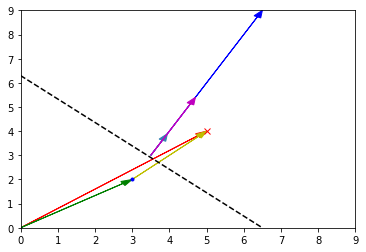

In [37]:
def plot_vector2d(vector2d, origin=[0, 0], **options):
    return plt.arrow(origin[0], origin[1], vector2d[0], vector2d[1],
              head_width=0.2, head_length=0.3, length_includes_head=True,
              **options)
plt.plot([5],[4],'rx')
plot_vector2d([5,4], color = "r")
plt.plot([3],[2],'b.')
plot_vector2d([3,2], color ="g")
plot_vector2d([2,2], origin = [3,2], color ="y")
plt.plot([0,6.5],[6.3,0],"k--")
w = np.array([3,6])
plot_vector2d(w, origin = [3.5,3], color ="b")
normalised_w = w/np.linalg.norm(w)
normalised_w
plot_vector2d(normalised_w, origin = [3.5,3], color =(0.2,0.5,0.7))
proj = np.dot([2,2],normalised_w)*normalised_w
plot_vector2d(proj, origin = [3.5,3], color ="m")
udacity_proj_magnitude = np.dot([2,2],normalised_w)
plt.axis([0,9,0,9])
print(udacity_proj_magnitude)
print(np.linalg.norm(proj)) 

The projection of $x^i$ onto another vector $L$ is given by the formula: 

- $ proj_L(x^i) = x_i.\hat{L} \times \hat{L}$
    - $x_i.\hat{L}$ is the doit product of the vector being projected with the vector being projeted on. This gives us a scalar number (The magnitude of the projection). 
    - Further, $\times \hat{L}$ is just done to scale that magniutde in the direction of the vector onto which you want to project. 
- Therefore, in udacity: (x_1 - x_2) dotted with the weight vector's unit vector is basically the magnitude of (x1 - x2) in the direction of the weight vector. 

In [38]:
normalised_w

array([ 0.4472136 ,  0.89442719])

In [39]:
np.linalg.norm([2,2])

2.8284271247461903

In [40]:
proj_magnitude = np.dot([2,2],normalised_w)
proj_magnitude

2.6832815729997477

In [41]:
example_vector = np.array([3,3,8])
np.linalg.norm(example_vector)

9.0553851381374173

In [42]:
example_w = np.random.randn(len(example_vector))
example_w
normalised_example_w = example_w/np.linalg.norm(example_w)
normalised_example_w

array([-0.35872859,  0.15903635,  0.91979413])

In [43]:
proj_magnitude = np.dot(example_vector, normalised_example_w)
proj_magnitude

6.7592762869331917

2.683281573
2.683281573


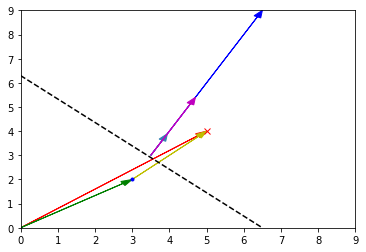

In [44]:
def plot_vector2d(vector2d, origin=[0, 0], **options):
    return plt.arrow(origin[0], origin[1], vector2d[0], vector2d[1],
              head_width=0.2, head_length=0.3, length_includes_head=True,
              **options)
plt.plot([5],[4],'rx')
plot_vector2d([5,4], color = "r")
plt.plot([3],[2],'b.')
plot_vector2d([3,2], color ="g")
plot_vector2d([2,2], origin = [3,2], color ="y")
plt.plot([0,6.5],[6.3,0],"k--")
w = np.array([3,6])
plot_vector2d(w, origin = [3.5,3], color ="b")
normalised_w = w/np.linalg.norm(w)
normalised_w
plot_vector2d(normalised_w, origin = [3.5,3], color =(0.2,0.5,0.7))
proj = np.dot([2,2],normalised_w)*normalised_w
plot_vector2d(proj, origin = [3.5,3], color ="m")
udacity_proj_magnitude = np.dot([2,2],normalised_w)
plt.axis([0,9,0,9])
print(udacity_proj_magnitude)
print(np.linalg.norm(proj)) 

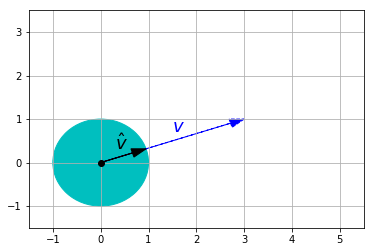

In [45]:
import numpy.linalg as LA
v = np.array([3,1])
plt.gca().add_artist(plt.Circle((0,0),1,color='c'))
# >> Adds a circles at origin, with radius 1 ( unit circle)
# and color = cyan

plt.plot(0, 0, "ko")
# >> Highlights the origin point in black

plot_vector2d(v, color="b", linestyle="--")
# >> Plots the vector v in blue color, using a dotted 
# line. 

plot_vector2d(v / LA.norm(v), color="k")
# >> Plots the normalized vector of v, in black color. 

x1_minus_x2 = [4,2]


plt.text(0.3, 0.3, "$\hat{v}$", color="k", fontsize=18)
plt.text(1.5, 0.7, "$v$", color="b", fontsize=18)
plt.axis([-1.5, 5.5, -1.5, 3.5])
plt.grid()
plt.show()

- SVM can perform: 
    - Linear or NonLinear Classification
    - Regression
    - Outlier Detection
- SVMs are particularly suited for complex, by small-medium sized datasets. 


# Setup

In [46]:
from __future__ import division, print_function, unicode_literals 

# Common Imports
import numpy as np
import os
import pandas as pd

# To make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figiures
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"

def save_fig(fig_id , tight_layout = True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, 
                  fig_id + ".png")
    print("Saving figure ", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format = "png", dpi = 300)

[__`sklearn.svm.SVC`__](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html):   


In [47]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [48]:
description = iris['DESCR']
print(description)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [49]:
iris['target_names'] 

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In [50]:
pd.DataFrame(np.c_[iris['data'],iris['target']],
            columns = iris["feature_names"] + ['y']).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [51]:
X = iris["data"][:,2:] # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y==1) 
# Taking data that belongs to label 0 and label 1 only.
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

pd.DataFrame(np.c_[X,y], columns = ["Petal Length", 
                                   "Petal Width", 
                                   "y"]).head()


,Petal Length,Petal Width,y
0,1.4,0.2,0.0
1,1.4,0.2,0.0
2,1.3,0.2,0.0
3,1.5,0.2,0.0
4,1.4,0.2,0.0


In [52]:
pd.DataFrame(np.c_[X,y], columns = ["Petal Length", 
                                   "Petal Width", 
                                   "y"]).tail()

,Petal Length,Petal Width,y
95,4.2,1.2,1.0
96,4.2,1.3,1.0
97,4.3,1.3,1.0
98,3.0,1.1,1.0
99,4.1,1.3,1.0


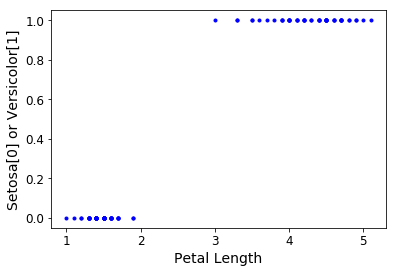

In [53]:
plt.plot(X[:,0],y, "b.")
plt.xlabel("Petal Length")
plt.ylabel("Setosa[0] or Versicolor[1]")

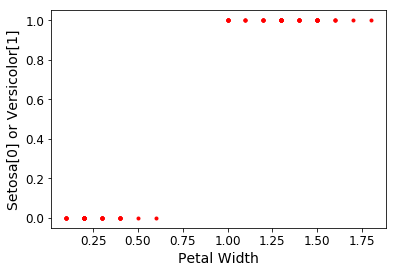

In [54]:
plt.plot(X[:,1],y, "r.")
plt.xlabel("Petal Width")
plt.ylabel("Setosa[0] or Versicolor[1]")

- __Plotting the above two shows that Setosa and Versicolor are different in both:__
    - Petal Length
        - Setosa has between 1 to just below 2.
        - Versicolor has between 3 and 5. 
    - Petal Width: 
        - Setosa has between 0.1 to 0.6
        - Versicolor has between 1 and 1.8. 

In [55]:
# SVM Classifier Model
svm_clf = SVC(kernel = "linear", C=float("inf"))
svm_clf.fit(X,y)

SVC(C=inf, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [56]:
X[:,0].min(), X[:,0].max()
# (1.0, 5.0999999999999996) Min-Max Petal Length

X[:,1].min(), X[:,1].max()
# (0.10000000000000001, 1.8) Min-Max Petal Width

(0.10000000000000001, 1.8)

In [57]:
svm_clf.coef_
# >> [[ 1.29411744,  0.82352928]] weights for x1 and x2

array([[ 1.29411744,  0.82352928]])

In [58]:
svm_clf.intercept_

array([-3.78823471])

In [59]:
svm_clf.support_vectors_
# Vectors that helo in making sure that the largest 
# margin is used.

array([[ 1.9,  0.4],
       [ 3. ,  1.1]])

In [60]:
margin = 1/svm_clf.coef_[0][1]
margin

1.2142859118931788

[0, 5.5, 0, 2]

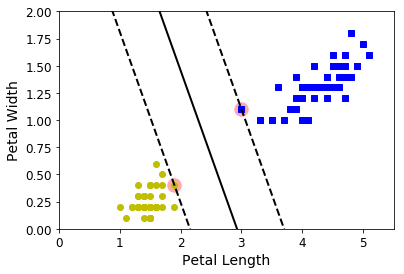

In [61]:
# Bad Models :

x0 = np.linspace(0, 5.5, 200)
# Making an array of 200 equally spread numbers between
# 0 and 5.5 as the values of X range between these 2 
# numbers. 


def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    # >> [ 1.29411744,  0.82352928]
    b = svm_clf.intercept_[0]
    # >> -3.78823471
    
    # At the decision boundry, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    # Creating 200 values between min-max values of input
    # data
    x1 = -w[0]/w[1]*x0 - b/w[1]
    # Finding the corresponding x1 values
    
    margin = 1/w[1]
    # >> Why is this exactly 1/w[1]
    gutter_up = x1 + margin 
    gutter_down = x1 - margin
    
    svs = svm_clf.support_vectors_
    # What are support vectors exactly? 
    plt.scatter(svs[:,0], svs[:,1], s = 180, 
               facecolors = '#FFAAAA')
    plt.plot(x0, x1, "k-", linewidth = 2)
    plt.plot(x0, gutter_up, "k--", linewidth = 2)
    plt.plot(x0, gutter_down, "k--", linewidth= 2)
    
# Plotting the data:
plt.plot(X[:,0][y == 1], X[:,1][y==1], "bs")
plt.plot(X[:,0][y==0], X[:,1][y==0], "yo")

# Plotting the decision boundary
plot_svc_decision_boundary(svm_clf, 0, 5.5)

plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.axis([0, 5.5, 0, 2])

Note that adding more training instances "off the street" will not affect the decision boundary at all. It is fully determined (or "supported") by the instances ocated on the edge of the street. 
- These instances are called support vectors (they are circled). 
    - SVMs are _maximum-margin classifiers_, which means that they find the hyperplane that has the largest perpendicular distance between the hyperplane and the closest samples on either side. 
    - The closest samples on either side are known as support vectors. 

### Sensitivity to Feature Scales: 
- __Note__: [It is very important to perform feature scaling before implementing Gaussian Kernel.](https://www.google.co.in/search?q=svm+sensitive+to+feature+scaling&oq=svm+sensitive+to+feature+scaling&aqs=chrome..69i57.6622j0j7&sourceid=chrome&ie=UTF-8)
    - Why? 
    - The formula for the similarity function (Gaussian Kernel) is: 
    - # $Similarity(x^i, l^i) = e^{-\frac{||x^i - l^i||^2}{2\sigma^2}}$
    - # $Similarity(x^i, l^i) = e^{-\frac{(x_1^i - l_1^i)^2 + (x_2^i - l_2^i)^2 + ... + (x_n^i - l_n^i)^2}{2\sigma^2}}$
    - Therefore, if the first feature: $x_1^i$ represents house sizes (1000's of square foot)
    - and the second feature $x_2^i$ represents number of bedrooms (1-5 bedrooms),
    - Then $(x_1^i - l_1^i)^2$ will be much larger than $(x_2^i - l_2^i)^2$. 
    - Therefore, the term: $||x^i - l^i||^2$, will be largely dominated by the house sizes and bedroom feature will be mostly ignored. 
    - This makes sure that the SVM will give attention to all the features.
- Generally, SVM constructs a hyperplane such that it has the largest distance to the nearest data point (support vectors). If the dimensions have different ranges, the dimnesion with much bigger range of values influences the distance more than other dimensions. Therefore, it is necessary to scaled the features so that all features have similar influence when calculating the decision boundary. 
- Another advantage is to avoid numerical difficulaties during the calculation. 

In [62]:
Xs = np.array([
    [1,50],
    [5,20],
    [3, 80],
    [5, 60]
]).astype(np.float64)

ys = np.array([0, 
               0,
               1,
               1])
pd.DataFrame(np.c_[Xs,ys])

,0,1,2
0,1.0,50.0,0.0
1,5.0,20.0,0.0
2,3.0,80.0,1.0
3,5.0,60.0,1.0


In [63]:
svm_clf = SVC(kernel = "linear", C = 100)
svm_clf.fit(Xs, ys)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

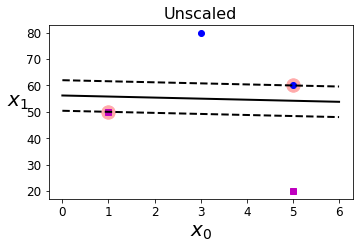

In [64]:
# UNSCALED VERSION: 

plt.figure(figsize = (12, 3.2))
plt.subplot(121)

# Plotting the data points belonging to y = 1. 
plt.plot(Xs[:,0][ys == 1], Xs[:,1][ys==1], "bo")

# Plotting the data points belonging to y = 0.
plt.plot(Xs[:,0][ys == 0], Xs[:,1][ys==0], 'ms')

plot_svc_decision_boundary(svm_clf, 0, 6)

plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$  ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)

[-2, 2, -2, 2]

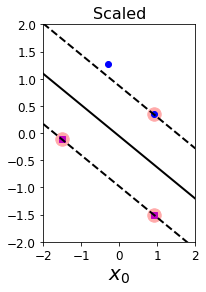

In [65]:
# WITH SCALING: 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])



## Soft Margin Classification: 

- If we strictly impose that all instances be off the  street (C is large) and on the right side, this is called _hard margin classification_. 
- There are two main issues with hard margin classification. 
    - It only works if the data is linearly seperable.
    - It is quite sensitive to outliers. 

__3. Explain how parameter C plays a role similar to the regularization parameter (lamda) and helps to account for outliers. __ 

- If C is very large, it means that:
    - More weight is given to the Cost Function than the regularisation term.
    - The optimisation objective would be to penalise(make small) the cost function more than the regularisation parameter. 
    - Therefore, the SVM would not like any errros, even if it does overfit the data. 
    - In the following case, the SVM should classify the points using the black line, but in th presense of outliers, it will try to overfit/ get least error. This is why it will try to fit the mageneta line. 

- On the other hand, if C is small, it means that:
    - More weight is given to the regularisation term than the cost function. 
    - The optimisation objective would be to penalise(make small) the weights more than the cost function.
    - Therefore the SVM would be fine getting some errors, as long as the weights are small enoguh. 

<img src="images/SVMS_coursera/Outliers.png"> 


__We should look to find the best tradeoff value of C, that fits the data well(causing few errors), and does not have large weights.__   
> __like the black line above__

__In other words, we should find a tradeoff value of C, that creates the least error and highest margin as possible while generalising well to new points. __  

In [66]:
X_outliers = np.array([
    [3.4, 1.3],
    [3.2, 0.8]
])
y_outliers = np.array([0,0])

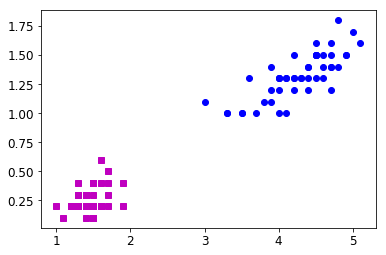

In [67]:
# Plotting the data points belonging to y = 1. 
plt.plot(X[:,0][y == 1], X[:,1][y==1], "bo")

# Plotting the data points belonging to y = 0.
plt.plot(X[:,0][y == 0], X[:,1][y==0], 'ms')

Saving figure  sensitivity_to_outliers_plot


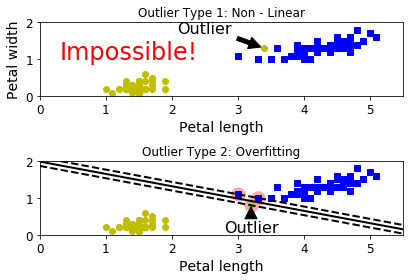

In [68]:
Xo1 = np.concatenate([X, X_outliers[:1]], axis = 0)
# 1 row of petal length and petal width added 
yo1 = np.concatenate([y, y_outliers[:1]], axis = 0)
# 1 row of labels added to y

Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
# 1 row of petal length and petal width added 
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)
# 1 row of labels added to y

svm_clf2 = SVC(kernel = "linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

# plt.figure(figsize=(12,2.7))


# OUTLIER TYPE 1 
plt.subplot(211)

# Plot points corresponding to label 1 in blue
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")

# Plot points corresponding to label 0 in yellow 
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")

# Denoting Linear Classification Impossible as one of 
# the yellow points lie among the blue ones
plt.text(0.3, 1.0, "Impossible!", fontsize=24, color="red")

plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)

# Annotating the Outlier
plt.annotate("Outlier",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.title("Outlier Type 1: Non - Linear")
plt.axis([0, 5.5, 0, 2])


plt.subplot(212)
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])
plt.title("Outlier Type 2: Overfitting")
save_fig("sensitivity_to_outliers_plot")

### Comparing the second outlier plot with the original data which did not have such an outlier. 

[0, 5.5, 0, 2]

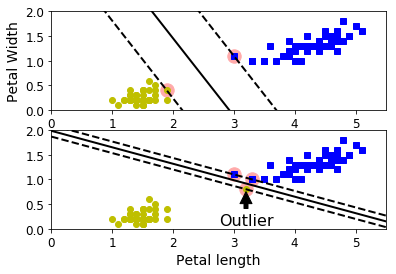

In [69]:
# SVM Classifier Model
svm_clf = SVC(kernel = "linear", C=float("inf"))
svm_clf.fit(X,y)


plt.subplot(211)

plt.plot(X[:,0][y == 1], X[:,1][y==1], "bs")
plt.plot(X[:,0][y==0], X[:,1][y==0], "yo")

# Plotting the decision boundary
plot_svc_decision_boundary(svm_clf, 0, 5.5)

plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.axis([0, 5.5, 0, 2])

plt.subplot(212)
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])


- __Notice__ : " In the first plot, the support vectors are quite far from the decision boundary.
- In the second plot, with the outlier, the support vectors are very close to the decision boundary.
- This is in some sense, overfitting to try to get the least errors. This is what a high value of C does. 
- A smaller value of C:
    - More _margin violations_ (intances that end up in the middle of the street or even on the wrong side)
    - Wider Street
- Big Value of C:
    - Lesser _margin violations_
    - Narrower street
- __If your SVM model is overfitting, you can try regularsizing it by using a small C__

## Large margin vs Margin Violations: 

- The following model loads the iris dataset, scaled the features, and then traing a linear SVM model (using the `LinearSVC class` with `C = 1`(High Regularised) and the `hinge loss function`. to detect the Iris-Virginica flowers. 

- __Note:__ The `LinearSVC class` regularizes the bias term, so you shoudl center the training set by subtracting its mean. 
- This is automatic if you scale the data using `StandardScaler`.
    - DOUBT: WHY? It regularises the bias term / the intercept term, so why is there are need to scale the features? 
- Moreover, make sure you set the `loss = "hinge"` as it is not the default value. 
- Finally, for better performance, you should set the `dual` hyperparameter to `False`, unless there are more features than training instaces. (Dicussed Later). 


In [70]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC


iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # Petal Length Petal Width
y = (iris["target"] == 2).astype(np.float64)
# 0 if 'vetosa` or `versicolor` 
# 1 if virginica

svm_clf = Pipeline((
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ))

svm_clf.fit(X, y)
# Calls fit_transform on X
# then calls fit of LinearSVC

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))))

In [71]:
svm_clf.predict([[5.5, 1.7]])

array([ 1.])

__Note__: Unlike Logistic Regression, SVM does not ouput a probability. Rather, it outputs a class.   
__Now, let's generate the graph comparing the different regularization settings:__  

In [72]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline((
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ))
scaled_svm_clf2 = Pipeline((
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ))

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=100, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))))

__Seems like the classifier below classifies a lot of the points as 1.__ 

In [73]:
# Small C, Wider Margin, More Errors
y_pred = svm_clf1.predict(X)
b1 = svm_clf1.decision_function(X)
more_than_0 = (b1 > 0).astype(np.bool)
decison_pred = np.c_[b1, more_than_0]
decison_pred = np.c_[decison_pred, y_pred]
decison_pred = np.c_[decison_pred, y]
decison_pred
pd.DataFrame(decison_pred , 
            columns = ["Decision Score", "Above 0?",
                       "Pred","True"]).head()

,Decision Score,Above 0?,Pred,True
0,0.261511,1.0,1.0,0.0
1,0.261511,1.0,1.0,0.0
2,0.097764,1.0,1.0,0.0
3,0.425258,1.0,1.0,0.0
4,0.261511,1.0,1.0,0.0


In [74]:
y_pred = svm_clf2.predict(X)
b1 = svm_clf2.decision_function(X)
more_than_0 = (b1 > 0).astype(np.bool)
decison_pred = np.c_[b1, more_than_0]
decison_pred = np.c_[decison_pred, y_pred]
decison_pred = np.c_[decison_pred, y]
pd.DataFrame(decison_pred , 
            columns = ["Decision Score", "Above 0?",
                       "Pred","True"]).head()

,Decision Score,Above 0?,Pred,True
0,2.944075,1.0,1.0,0.0
1,2.944075,1.0,1.0,0.0
2,2.304462,1.0,1.0,0.0
3,3.583688,1.0,1.0,0.0
4,2.944075,1.0,1.0,0.0


In [75]:
y_pred = svm_clf2.predict(X)
df = np.c_[X, y_pred]
df = np.c_[df, y]
pd.DataFrame(df).describe() 
# WHY ARE MOST OF THE PREDICTIONS 1?????

,0,1,2,3
count,150.000000,150.000000,150.0,150.000000
mean,3.758667,1.198667,1.0,0.333333
std,1.764420,0.763161,0.0,0.472984
min,1.000000,0.100000,1.0,0.000000
25%,1.600000,0.300000,1.0,0.000000
50%,4.350000,1.300000,1.0,0.000000
75%,5.100000,1.800000,1.0,1.000000
max,6.900000,2.500000,1.0,1.000000


# DOUBT: Do not understand the following code at all! 

In [76]:
# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

Saving figure  regularization_plot


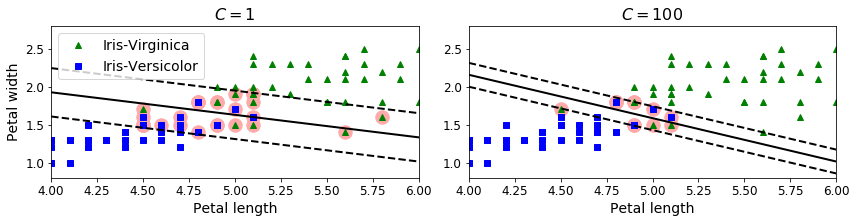

In [77]:
plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris-Virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris-Versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

plt.subplot(122)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

save_fig("regularization_plot")

Decision Boundary:   
http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html

https://stackoverflow.com/questions/22294241/plotting-a-decision-boundary-separating-2-classes-using-matplotlibs-pyplot

https://discussions.udacity.com/t/kernel-and-gamma-plot/167242/2

### Non - Linear SVM Classification: 

- One approach is to add more features (Polynomial Features) 

In [78]:
X1D = np.linspace(-4,4,9).reshape(-1,1)
X1D

array([[-4.],
       [-3.],
       [-2.],
       [-1.],
       [ 0.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.]])

In [79]:
X2D = np.c_[X1D, X1D**2] # Adds a column 
X2D

array([[ -4.,  16.],
       [ -3.,   9.],
       [ -2.,   4.],
       [ -1.,   1.],
       [  0.,   0.],
       [  1.,   1.],
       [  2.,   4.],
       [  3.,   9.],
       [  4.,  16.]])

Saving figure  higher_dimensions_plot


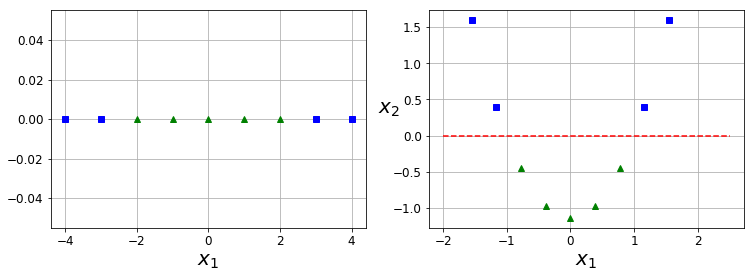

In [80]:
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize = (11,4))

plt.subplot(1,2,1)
plt.grid(True)
# Plotting the positive examples in green triangles 
# on the x1 axis
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")

# Plotting the negative examples in blue squares on the
# x1 axis
plt.plot(X1D[:,0 ][y==0], np.zeros(4), "bs")

plt.xlabel(r"$x_1$", fontsize = 20)

plt.subplot(1,2,2)
plt.grid(True)

# Scaling the 2D values and plotting them, to compare 
# manual decision boundary with that given by an SVM

X2D_scaled = scaler.fit_transform(X2D)
plt.plot(X2D_scaled[:,0][y==1], X2D_scaled[:,1][y==1], "g^")
plt.plot(X2D_scaled[:,0][y==0], X2D_scaled[:,1][y==0], "bs")
plt.plot([-2,2.5],[0,0], "r--") # Manual Decision Boundary
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plt.subplots_adjust(right=1)

save_fig("higher_dimensions_plot", tight_layout=False)
plt.show()

- The above diagram illustates the importance of polynomial features.  
- The left plot has only one feature, `x1` and thus, is not linearly seperable. 
- But as soon as we add a second feature(`x1**2`), and plot it in `x1-x2` graph, we see that we can easily seperate the data using a line. 
- __In conclusion:  
Adding polynomial features is like taking each training example and finding new features that differentiate that training example from others. When it was 1 dimensional, all the training examples were in a line, when we convert it to 2 dimensional, we get a parabola, when we have 3 dimensional, we can seperate and differentiate each data point more meticulously/specifically from other data points which are in the same space.__ 

#### Trying to implement the above using an SVM. Maybe i'm able to gain some insights about Decision Boundaries by the `coef_` and `intercept_` feature (if they are similar to the random decision boundary i drew above! 

In [81]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2,
                                  include_bias = False)
X2D = poly.fit_transform(X1D)

svm_clf3 = LinearSVC(C = 100000 , loss = "hinge", 
                            random_state = 42,)
svm_clf_poly = Pipeline((
("polynomial", PolynomialFeatures(degree=2,
                                  include_bias = False)),
    ("scaler", StandardScaler()),
    ("linear_svc", svm_clf3)
))

svm_clf_poly.fit(X1D, y)
w0 , w1 = svm_clf3.coef_[0][0], svm_clf3.coef_[0][1]
w0,w1
# >> array([[  5.08686326e-06,  -2.33997961e+00]])

(5.086863255592169e-06, -2.3399796065945244)

In [82]:
b = svm_clf3.intercept_
b

array([-0.0666651])

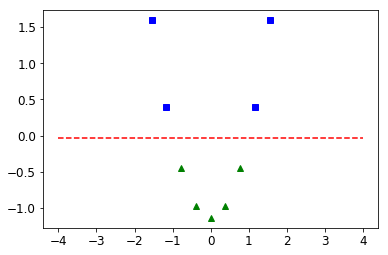

In [83]:
scaler = StandardScaler()
X2D_scaled = scaler.fit_transform(X2D)
plt.plot(X2D_scaled[:,0][y==1], X2D_scaled[:,1][y==1], "g^")
plt.plot(X2D_scaled[:,0][y==0], X2D_scaled[:,1][y==0], "bs")

# Creating a sample x0 for plotting
x0 = np.linspace(X1D.min(), X1D.max(), 100)

# If the weights and the intercept terms calculated
# are right, then: 
# w0x0 + w1x1 + b = 0
# We have x0, we don't have x1 where w0x0 + w1x1 + b = 0
# Therefore, x1 = -b - w0/w1*x0

x1 = - (w0/w1)*x0 -b/w1
plt.plot(x0,x1, "r--")

- Conclusion:  
     - The decision boundary drawn manually mathes the decision boundary given by the weights and intercept(x1_intercept) of the SVM. 
      - The intercept is close to 0, as in the case of the manual boundary. 
      - The weights are 5 and -2.33, which when multiplied with x0 and x1 respectively, and itercept is added give w0x0 + w1x1 + b = 0. 

In [84]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples = 100, noise = 0.15, 
                 random_state = 42)

# Simple Toy Dataset to visualize clustering and 
# classfication algorithms. 
# Returns Input Array of shape [n_samples, 2]
# Returns output arrays of shape [n_samples, ]
pd.DataFrame(np.c_[X,y], columns = ["x0", "x1", "y"]).head()


,x0,x1,y
0,1.613838,-0.491151,1.0
1,0.089847,0.504391,1.0
2,0.747210,-0.369111,1.0
3,-1.101745,0.236856,0.0
4,-0.728715,0.146523,0.0


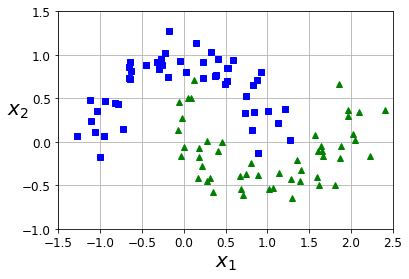

In [85]:
def plot_data_set(X, y, axes): 
    plt.plot(X[:,0][y==1], X[:,1][y==1], "g^")
    plt.plot(X[:,0][y==0], X[:,1][y==0], "bs")
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel(r"$x_1$", fontsize = 20)
    plt.ylabel(r"$x_2$", fontsize = 20, rotation = 0)
    
plot_data_set(X,y, [-1.5, 2.5, -1, 1.5])

In [86]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

svm_clf_poly = Pipeline((
("polynomial", PolynomialFeatures(degree=3,
                                  include_bias = False)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C = 10 , loss = "hinge", 
                            random_state = 42,))
))

svm_clf_poly.fit(X,y)


Pipeline(steps=(('polynomial', PolynomialFeatures(degree=3, include_bias=False, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))))

In [87]:
# axes = [-1.5, 2.5, -1, 1.5]
# x0s = np.linspace(axes[0], axes[1], 100)
#     # Makes 100 values in between min and max of x0
    
# x1s = np.linspace(axes[2], axes[2], 100)
#     # Makes 100 values in between min and max of x1
    
# x0, x1 = np.meshgrid(x0s, x1s)

# x0x1 = np.c_[x0s,x1s]
# x0x1 = np.c_[x0x1, x1]
# # x0x1 = np.c_[x0x1, x1]

# # pd.DataFrame(x0)

# # pd.DataFrame(x0.ravel())

# X = np.c_[x0.ravel(), x1.ravel()]
# X.shape


# y_pred = svm_clf_poly.predict(X)
# y_pred.shape
# # >> (10000, )

# # x0.shape
# # # >> (100,100)



,samle_x0,sample_x1,decision_score
6252,0.601010,0.565657,-0.841839
4684,1.893939,0.161616,1.795299
1731,-0.247475,-0.570707,2.401846
4742,0.196970,0.186869,1.066089
4521,-0.651515,0.136364,-0.221596


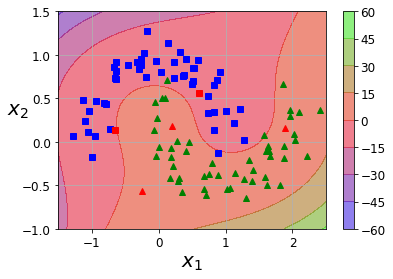

In [89]:
plot_data_set(X,y, [-1.5, 2.5, -1, 1.5])

from mpl_toolkits.mplot3d import Axes3D  
axes = [-1.5, 2.5, -1, 1.5]

x0s = np.linspace(axes[0], axes[1], 100)
# Makes 100 values in between min and max of x0

x1s = np.linspace(axes[2], axes[3], 100)
# Makes 100 values in between min and max of x1

x0, x1 = np.meshgrid(x0s, x1s)
# x0 is a 100 X 100 array with each row = x0s
# x1 is a 100 X 100 array with each row = x1s

X_new = np.c_[x0.ravel(), x1.ravel()]
# >> This will make a [10000 ,2] array 
# .ravel() makes the 100 X 100 arrays into (100,)
# arrays , then np.c_ concatenates them as 2 columns
# Basically, after every 10 values in each column
# values are repeated. 

y_pred = svm_clf_poly.predict(X_new).reshape(x0.shape)
# Making prediciton on toy testing data (10000 , 2)
# of shape (10000, )
# and reshaping into [100 X 100 array] array. 

y_decision = svm_clf_poly.decision_function(X_new).reshape(x0.shape)
# Returns the scores instead of predicitons

#     plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.5)
plt.colorbar()
plt.axis([-1.5, 2.5, -1, 1.5])
plt.plot(X_new[6252, 0], X_new[6252, 1], 'rs', 
        X_new[4684, 0], X_new[4684, 1], 'r^',
        X_new[1731, 0], X_new[1731, 1], 'r^',
        X_new[4742, 0], X_new[4742, 1], 'r^',
        X_new[4521, 0], X_new[4521, 1], 'rs',)
pd.DataFrame(np.c_[X_new, y_decision.reshape(10000,)],
            columns = ["samle_x0", "sample_x1", "decision_score"]
            ).sample(frac=5/10000, random_state = 42)

- As you can see here, we used a contour plot and a colour map to plot our model. 
- We have plotted our data points using the x1_x2 graph. 
- That is simple. Then what did you do?
- We made `toy testing data` for contour plots. 
- What do you mean by toy testing data for contour plots? 
- Ok, For contour plots, we need to have such a setting where the same training example gets different decision scores. 
- This will help us in getting enough points to plot our x0, x1, decion contour plots. 
- For this we used the minimum and maximum values of x0 and x1, then we created a meshgrid, which consisted repetetive values of x0 and x1. 
- combining them in `X_new`, we made a pedictions on them. 
- Think of the decision function plot as a monutain, at the top, is the highest decision score(60) and at the least is the lowest decision score (-60).
- Our decision function contour plot is dependent on the data just for the parameters for the prediction function. Nothing else, you see that it makes prediction for some many points (x1, x2) that are not even in the dataset. For eg: (2.5,-1) is green (very high decision function value), but does not really exist in the dataset. 

,samle_x0,sample_x1,prediction
6252,0.601010,0.565657,0.0
4684,1.893939,0.161616,1.0
1731,-0.247475,-0.570707,1.0
4742,0.196970,0.186869,1.0
4521,-0.651515,0.136364,0.0


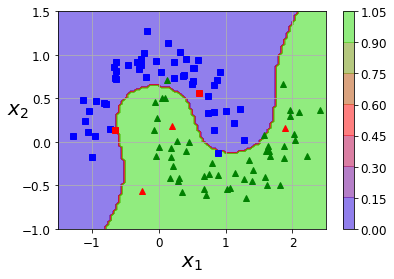

In [90]:

plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.5)
plt.colorbar()
plt.axis([-1.5, 2.5, -1, 1.5])
plot_data_set(X,y, [-1.5, 2.5, -1, 1.5])
plt.plot(X_new[6252, 0], X_new[6252, 1], 'rs', 
        X_new[4684, 0], X_new[4684, 1], 'r^',
        X_new[1731, 0], X_new[1731, 1], 'r^',
        X_new[4742, 0], X_new[4742, 1], 'r^',
        X_new[4521, 0], X_new[4521, 1], 'rs',)
pd.DataFrame(np.c_[X_new, y_pred.reshape(10000,)],
            columns = ["samle_x0", "sample_x1", "prediction"]
            ).sample(frac=5/10000, random_state = 42)

- Similarly, you can think of this also as a mountain. Except it has only 2 values on the z axis (0 and 1). 
- 1 is at the top. 
- 0 is at the bottom. 
- The points in the purple part are all down at 0. 
- The points in the green part are way up in the mountain at 1. 

## Polynomial Kernel: 
- Adding polynomial features is simple to implement and can work greatwith all sorts of machine learning algorithms (not just SVMs) , but at a low polynomial degree, it can deal with very complex datasets, and a high degree polynomial creates a hige number of features, making the model too slow. 

- Fortunately, when using SVMs you can apply an almost mirculous mathematical technique called the _kernel trick_. 
- It makes it possible to get the same result as if you had added many polynomial features, even with high degree polynomials, without actually adding them. 
- So there is no explosion of features sich you do not actually add any features. 
- The trick is implemented by the `SVC class`. 


In [91]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline(
(
("scaler", StandardScaler()),
("svm_clf", SVC(kernel = "poly", degree = 3, coef0 = 1, 
               C = 1))))
# coef0 is the independent term in kernel function. It 
# controls how much the model is influenced by high-degree
# polynomials versus low-degree polynomials. 
poly_kernel_svm_clf.fit(X,y)

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=1, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))))

Saving figure  C1_d3_coef1


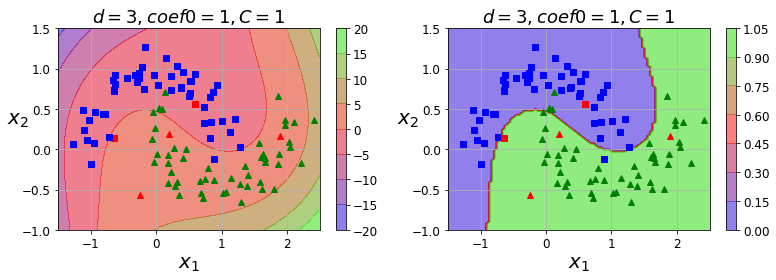

In [92]:

y_pred = poly_kernel_svm_clf.predict(X_new).reshape(x0.shape)
# Making prediciton on toy testing data (10000 , 2)
# of shape (10000, )
# and reshaping into [100 X 100 array] array. 

y_decision = poly_kernel_svm_clf.decision_function(X_new).reshape(x0.shape)
# Returns the scores instead of predicitons

#     plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
plt.figure(figsize=(11, 4))

plt.subplot(1,2,1)
plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.5)
plt.colorbar()
plt.axis([-1.5, 2.5, -1, 1.5])
plt.plot(X_new[6252, 0], X_new[6252, 1], 'rs', 
        X_new[4684, 0], X_new[4684, 1], 'r^',
        X_new[1731, 0], X_new[1731, 1], 'r^',
        X_new[4742, 0], X_new[4742, 1], 'r^',
        X_new[4521, 0], X_new[4521, 1], 'rs',)
plot_data_set(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, coef0=1, C=1$", fontsize=18) 

plt.subplot(1,2,2)
plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.5)
plt.colorbar()
plt.axis([-1.5, 2.5, -1, 1.5])
plot_data_set(X,y, [-1.5, 2.5, -1, 1.5])
plt.plot(X_new[6252, 0], X_new[6252, 1], 'rs', 
        X_new[4684, 0], X_new[4684, 1], 'r^',
        X_new[1731, 0], X_new[1731, 1], 'r^',
        X_new[4742, 0], X_new[4742, 1], 'r^',
        X_new[4521, 0], X_new[4521, 1], 'rs',)
plt.title(r"$d=3, coef0=1, C=1$", fontsize=18) 

save_fig("C1_d3_coef1")

In [93]:
poly10_kernel_svm_clf = Pipeline(
(
("scaler", StandardScaler()),
("svm_clf", SVC(kernel = "poly", degree = 10, 
                coef0 = 100, 
               C = 5))))
poly10_kernel_svm_clf.fit(X,y)

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=100,
  decision_function_shape=None, degree=10, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))))

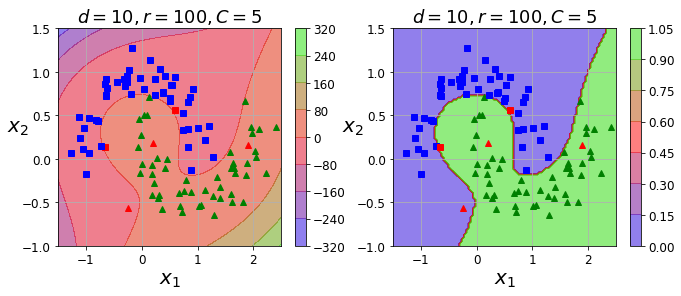

In [94]:

y_pred = poly10_kernel_svm_clf.predict(X_new).reshape(x0.shape)
# Making prediciton on toy testing data (10000 , 2)
# of shape (10000, )
# and reshaping into [100 X 100 array] array. 

y_decision = poly10_kernel_svm_clf.decision_function(X_new).reshape(x0.shape)
# Returns the scores instead of predicitons

#     plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
plt.figure(figsize=(11, 4))

plt.subplot(1,2,1)
plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.5)
plt.colorbar()
plt.axis([-1.5, 2.5, -1, 1.5])
plt.plot(X_new[6252, 0], X_new[6252, 1], 'rs', 
        X_new[4684, 0], X_new[4684, 1], 'r^',
        X_new[1731, 0], X_new[1731, 1], 'r^',
        X_new[4742, 0], X_new[4742, 1], 'r^',
        X_new[4521, 0], X_new[4521, 1], 'rs',)
plot_data_set(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)

plt.subplot(1,2,2)
plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.5)
plt.colorbar()
plt.axis([-1.5, 2.5, -1, 1.5])
plot_data_set(X,y, [-1.5, 2.5, -1, 1.5])
plt.plot(X_new[6252, 0], X_new[6252, 1], 'rs', 
        X_new[4684, 0], X_new[4684, 1], 'r^',
        X_new[1731, 0], X_new[1731, 1], 'r^',
        X_new[4742, 0], X_new[4742, 1], 'r^',
        X_new[4521, 0], X_new[4521, 1], 'rs',)
plt.title(r"$d=10, r=100, C=5$", fontsize=18)

- We know what C does. 
    - The more the C, the more overfit the model can be.
    - The less the C, the underfit the model can be. 
- Degree of a polynomial does exactly what it used to do. The more the degree, the more it overfits. 
- DOUBT: Did not really understand what coef0 does. Increasing and decreasing it did not give constant / differentiating results as such. 
    - Increasing it too much made the model underfit. 
    - But decreasing it too much 0 , made it overfit. 
    - But not conclusive, i am. 
    
__TIP: __  
- A common approach to find the right hyperparameters values is to use a grid search. 
- It is often the faster to do a rough search, then a finer search arounf the best vaues found. 
- Having a good sense of what each hyperparameter actually does also can helpy you search in the right part of the hyperparameter space. 

### Adding Similarity Features: 

- Another technique to tackle nonlinear problems is to add features computed using _similarity function_ that measure how much each instance resembles a given _landmark_. 
- Eg: Let's take the 1 dimensional dataset discussed earlier and add two landmarks. 
    - $ x^1 = -2 $ 
    - and $ x^1 = 1 $ 

In [95]:
X1D

array([[-4.],
       [-3.],
       [-2.],
       [-1.],
       [ 0.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.]])

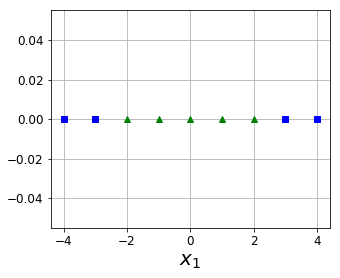

In [96]:
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize = (11,4))

plt.subplot(1,2,1)
plt.grid(True)
# Plotting the positive examples in green triangles 
# on the x1 axis
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")

# Plotting the negative examples in blue squares on the
# x1 axis
plt.plot(X1D[:,0 ][y==0], np.zeros(4), "bs")

plt.xlabel(r"$x_1$", fontsize = 20)

- Next, let's define the similarity function to be the Gaussian Radial Basis Function.   

# $\phi\gamma(X, l) = e^{-\gamma||x - l||^2}$

- It's a bell shaped function varying from 0 (very far away from the landmark) to 1(at the ladmark). 
- This is because of the similar reason you encounter earlier.
    - When $x$ and $l$ are close: 
        - ## $e^0 = 1$ 
    - when $x$ and $l$ are very far way 
        - ## $e^{-large number} = \frac{1}{e^{large number}} \approx 0$ 
- For instance, looking at $x^1 = -1$: 
    - Its located at a distance of 1 from the 1st landmarks 
    - And a distance of 2 from the 2nd landmark. 
    - Therefore, $x_1$'s new features are:
        - ### $e^{(-0.3\times 1)^2}$ and
        - ### $e^{(-0.3\times 2)^2}$
        - Using these 2 features, $x^2$ and $x^3$ (ignoring the original feature), when you plot $x^2$ vs $x^3$ plot, you will notice that the data became linearly seperable. 

In [105]:
"""
x1s = np.linspace(-4.5, 4.5, 200).reshape(-1,1)
"""
# >> (200,1)
""""
difference  = x1s - (-2) 
difference.shape
"""
# >> (200,1)
# Now, i do not want the norm of the whole vector, just 
# each entry

# Norm of whole difference vector: 
"""
np.linalg.norm(difference)
"""
# >> 46.514168155476888 Scalar

"""
np.ceil(np.linalg.norm(difference, axis = 1)) 
"""
# >> array([ 2.5       , 
# 2.45477387, 
# 2.40954774, 
# 2.36432161,  
# 2.31909548,

# Which is the same as the norm of each term in the 
# difference vector 
"""
np.sqrt(difference**2)
"""
# array([[ 2.5       ],
#        [ 2.45477387],
#        [ 2.40954774],
#        [ 2.36432161],
#        [ 2.31909548],
#        [ 2.27386935],

'\nnp.sqrt(difference**2)\n'

In [98]:
def gaussian_rbf(x, landmark, gamma):
    difference = x - landmark
    return np.exp(-gamma * np.linalg.norm(difference, axis = 1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1,1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)
x1s.shape, x2s.shape

((200, 1), (200,))

[-0.1, 1.1, -0.1, 1.1]

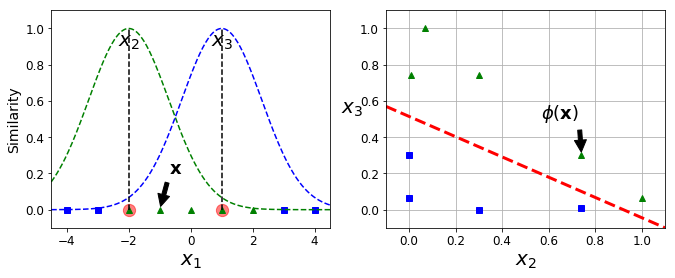

In [103]:
XK = np.c_[gaussian_rbf(X1D, -2, gamma), 
           gaussian_rbf(X1D, 1, gamma)]
yk = y

plt.figure(figsize = (11,4))

plt.subplot(1,2,1)
# Plotting the data: 
# Negative Examples: 
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
# Positive Examaples:
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")

# Highlighting the Landmarks: 
plt.scatter(x = [-2,1], y = [0,0], s = 150, alpha = 0.5,
           c = "red")

# Plotting the Gaussian Radial Basis Function with respect
# to x1s, and landmark: -2 
plt.plot(x1s, x2s, "g--")

# Plotting the Gaussian Radial Basis Function with respect
# to x1s, and landmark: 
plt.plot(x1s, x3s, "b--")

plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similarity", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)

plt.plot([-2,-2],[0,1], "k--")
plt.plot([1,1],[0,1], "k--")
plt.axis([-4.5, 4.5, -0.1, 1.1])  

# Plotting the new features against each other to show
# how they become lineary seperable. 

plt.subplot(122)
plt.grid(True, which='both')

plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")

plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])

- __Things to Note: __ 
    - __Similarity Graph__: 
        - The similarity score touches 1 when x is the landmark itself. 
        - The similarity score decreases as the x moves away from landmark. 
    - __x2 vs x3 graph__: 
        - Using the new features generated, the data becomes linealy seperable. Similar to how introducing another feature (square of each feature) did 
        - This just emphasis the point that introducing new features, increases dimensions and helps in seperating the data linearly. 

- You may wonder how to select the landmarks: 
    - The simplest approach is to create a landmark at the loccation of each and every instance in the dataset. 
    - This creates many dimensions and thus increases the chances of that the transformed set will be linearly seperable. 
    - The downside is that a training set with `m` instances and `n` features gets transformed into a training set with `m` instance and `m` features. (assuming you drop the original features). 
    - If your training set is very large, you end up with an equally large number of features. 
    

## Gaussian RBF Kernel: 

- Just like the polynomial features method, the similarity features method can be useful for any machine learning algorithm, ut it may be computationally expensive to compute all the additional features, especially on large training sets. 
- However, once again, th kernel trcik does the SVM magic: it makes it possible to obtain similar result as if you had added many similarity features, without actually having to add them. 
- Lets try the the Gaussian RBF kernel using the `SVC` class: 


## Under The Hood: 

- This section how SVMs make predictions and how thir training algorithms work, starting with linear SVM classifiers. 
- __Notation__: 
    - The bias term will be called b
    - feature weights vector will be called __w__
    - No bias feature($x_0, \theta_0$) will be added to the the input feature vectors or weight vectors, respectively. 

### Decision Function and Predictions: 

- The linear SVM classifier modep predicts the class of a new instance __x__ by simply computing the decision function o __$w^t . x + b = w_1.x_1 + ... + w_n.x_n + b$.__ 
- If the result is positive, the predicted class $\hat{y}$ is the positive class (1), or else it is the negative class (0). 
- # $ \hat{y} = 0$ if $w^t . x + b < 0 $
- # $ \hat{y} = 0$ if $w^t . x + b \geq 0$ 

In [164]:
iris = datasets.load_iris()
X = iris["data"][:, 2:]# Petal Length, Petal Width
y = (iris["target"] == 2).astype(np.float64)
# 1 if Virginica, 0 if Setosa or Versicolor
X.shape, y.shape

((150, 2), (150,))

In [180]:
svm_clf2 = LinearSVC(C = 100, 
                     loss = "hinge", 
                     random_state = 42)

# scaled_svm_clf2 = Pipeline((
#         ("scaler", scaler),
#         ("linear_svc", svm_clf2),
#     ))
svm_clf2.fit(X, y)


LinearSVC(C=100, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0)

In [181]:
w = svm_clf2.coef_[0]
w

array([ 1.28054704,  3.11575038])

In [182]:
b = svm_clf2.intercept_[0]
b

-11.380621631566182

In [183]:
X[:,0].min(), X[:,0].max(), X[:,1].min(), X[:,1].max()

(1.0, 6.9000000000000004, 0.10000000000000001, 2.5)

In [184]:
X[:,0][y==0].min(), X[:,0][y==0].max(), X[:,1][y==0].min(), X[:,1][y==0].max()

(1.0, 5.0999999999999996, 0.10000000000000001, 1.8)

In [185]:
X[:,0][y==1].min(), X[:,0][y==1].max(), X[:,1][y==1].min(), X[:,1][y==1].max()

(4.5, 6.9000000000000004, 1.3999999999999999, 2.5)

- Range for class 0:
    - Petal Length: 1 -6
    - Petal Width: 0.1 - 1.8
- Range for class 1: 
    - Petal Length: 4 - 7
    - Petal Width: 1.4 - 2.5 
 
__Therefore, we notice that there is an overlap in Petal Length. In betwee  PL: 4-6, there are some instances that are 0 and some instances that are 1. __
- On the other hand, Petal Width feature has a very small overlap. Between PW 1.4 and 1.8, there are some that belong to class 0 and some that belong to class 1.

In [186]:
from mpl_toolkits.mplot3d import Axes3D

x1_lim = [4,6]
x1_in_bounds = ((X[:, 0] > x1_lim[0]) & (X[:,0]<x1_lim[1]))
pd.DataFrame(np.c_[np.c_[X, x1_in_bounds],y], 
            columns = ["Petal Legnth",
                      "Petal Width",
                      "x1_lim", "y"]).sample(frac=5/150,
                                            random_state = 42)
# >> x1 in bounds in a boolean array which will be used
# to index flowers which have petal length greater than 4
# but less than 6. 

,Petal Legnth,Petal Width,x1_lim,y
73,4.7,1.2,1.0,0.0
18,1.7,0.3,0.0,0.0
118,6.9,2.3,0.0,1.0
78,4.5,1.5,1.0,0.0
76,4.8,1.4,1.0,0.0


In [187]:
X_crop = X[x1_in_bounds] # overlapping points
y_crop = y[x1_in_bounds] 
X_crop.shape, y_crop.shape

((73, 2), (73,))

In [188]:
x1s = np.linspace(x1_lim[0], x1_lim[1], 20)
#>> Making 20 toy petal lengths between the overlapping
# points 4 and 6. 

x2_lim = [0.8, 2.8]
x2s= np.linspace(x2_lim[0], x2_lim[1], 20)
# >> Making 20 toy petal widths 

x1, x2 = np.meshgrid(x1s, x2s)
# x1 and x2 are 20 X 20 arrays. (20 rows with 20 cols)
# Each row is equal to one x1s/x2s, respectively.

In [189]:
xs = np.c_[x1.ravel(), x2.ravel()]
# >> Making an input array, having order (400,2). 
# This will have 20 unique values for petal length
# and 20 unique value for petal width. 
# Each value is repeated 20 times. 
xs.shape

(400, 2)

In [190]:
# Decision Function For Original Training Data
df = (X.dot(w) + b)
pd.DataFrame(np.c_[np.c_[X,df],y], 
            columns = ["Petal Legnth", 
                      "Petal Width",
                      "Decision Score",
                      "True Output"]).sample(frac = 5/150,
                                            random_state = 22)

,Petal Legnth,Petal Width,Decision Score,True Output
10,1.5,0.2,-8.836651,0.0
115,5.3,2.3,2.572504,1.0
54,4.6,1.5,-0.816480,0.0
146,5.0,1.9,0.942039,1.0
63,4.7,1.4,-1.000000,0.0


In [191]:
# Decion Function For Test Toy Data: 
df = (xs.dot(w) + b).reshape(x1.shape)
pd.DataFrame(np.c_[np.c_[xs,df.reshape(400,)]], 
            columns = ["Petal Length", 
                      "Petal Width",
                      "Decision Score",]).sample(frac = 5/400,
                                            random_state = 22)

,Petal Length,Petal Width,Decision Score
261,4.105263,2.168421,0.632620
393,5.368421,2.800000,4.217995
378,5.894737,2.694737,4.563994
185,4.526316,1.747368,-0.140098
202,4.210526,1.852632,-0.216507


In [197]:
# Margin
m = 2/np.linalg.norm(w)
m

0.59371230584196799

- For decision boundary: 
    - `w1x_1 + w2x2 + b = 0`
    - `x2 = -b/w2 - (w1/w2) * x1`

In [202]:
# Finding the x2s coordinate for the boundary line,
# given x1s coordinate. 
boundary_x2s = -x1s*(w[0]/w[1]) - b/w[1]

# Finding the margin line gutter down: 
margin_x2s_1 = -x1s*(w[0]/w[1])-(b-1)/w[1]
# Finding the margin line gutter up:
margin_x2s_2 = -x1s*(w[0]/w[1])-(b+1)/w[1]

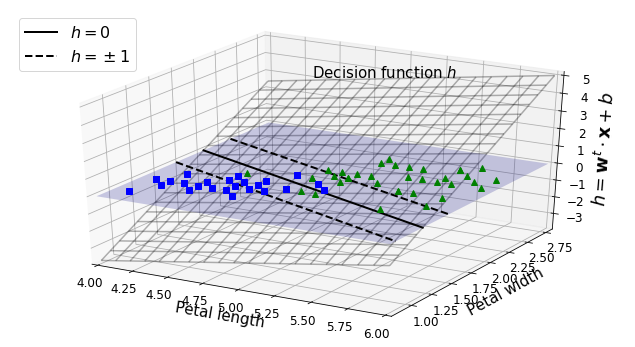

In [203]:
fig = plt.figure(figsize=(11, 6))
ax1 = fig.add_subplot(111, projection='3d')

ax1.plot_surface(x1s, x2, 0, color="b", alpha=0.2,
                cstride=100, rstride=100)

ax1.plot(x1s, boundary_x2s, 0, "k-", linewidth=2, label=r"$h=0$")
ax1.plot(x1s, margin_x2s_1, 0, "k--", linewidth=2, label=r"$h=\pm 1$")
ax1.plot(x1s, margin_x2s_2, 0, "k--", linewidth=2)
ax1.plot(X_crop[:, 0][y_crop==1], X_crop[:, 1][y_crop==1], 0, "g^")
ax1.plot_wireframe(x1, x2, df, alpha=0.3, color="k")
ax1.plot(X_crop[:, 0][y_crop==0], X_crop[:, 1][y_crop==0], 0, "bs")
ax1.axis(x1_lim + x2_lim)
ax1.text(4.5, 2.5, 3.8, "Decision function $h$", fontsize=15)
ax1.set_xlabel(r"Petal length", fontsize=15)
ax1.set_ylabel(r"Petal width", fontsize=15)
ax1.set_zlabel(r"$h = \mathbf{w}^t \cdot \mathbf{x} + b$", fontsize=18)
ax1.legend(loc="upper left", fontsize=16)

- __Conclusively, the decision boundary is the set of points where the decision function is equal to 0: __

- __Note__ It is the intersection of the two planes:
     - The first one in x1,x2, 0. This is the plane that represents all combinations of x1 and x2 where decision score is 0. 
     - The second is the decison function plane for all x1-x2s. 
     - Where the above 2 planes intersect, the decision boundary (line) is formed. This sepearates the 2 classes. 
- The dashed lines represent the points where the decision function is equal to 1 or -1. 
- Training a linear SVM classifer meansing finding the __w__ values and _b_ that makes this margin as wide as possible while 
    - avoiding violations (hard margin): Big C, 
    - or limiting them (soft margin): Small C 

### Training Objective: 

- Consider the slope of the decision function: It is equal to the norm of the weight vector __$||w||$__. 
- If we divide the slope by 2, the points where the decision funciton is equal to +1, -1 are going to be twice as far away from the decision bounary. 
- In other words, dividing the slope by 2, will multiply the margin by 2. 

#### Smaller Weight Vector Results in Larger Margin: 


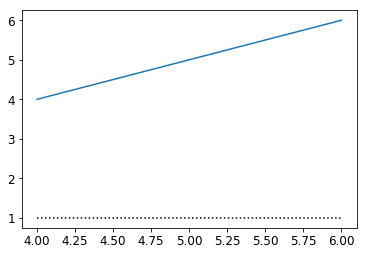

- So, we want to minimise the norm of the weight vector to maximise the margin. However, if we also want to avoid margin violation (hard margin, bigger C, narrow street), then we need the decision function to be greater than 1 for all positive training instance and lower than -1 for all negative training instances. 
    - Why? 
    - If all positive trainnig instances have a decion score of more than 1, that will creat the margin towards the positive instances. As the first instance that is in the positive region will have a decision score of 1. 
    - If all negative instances have a decision score of less than -1, that will create the margin towards the negative instances. As the first instance is in the negative region will have a decision score of -1. 
    
- If we define $t^i = -1$ for negative instances $ y^i = 0$ 
- and we define $t^i = 1$ for positive instances $y^i = 1$, then we can express the above constraint as:
- # $t^i(w^T.x^i + b) \geq 1 $ for all the instances. 

- __Now, we can minimising the norm of the weight vector undert this constaint. This constaint basically says:__
    - Minimise the norm of the weight vector 
    - which will ultimately maximise the margin
    - under the condition that you classify everything correctly, i.e the labels with $t^i = -1$ should have a decision score of less than -1, and the labels with $t^i = 1$ should have a decision score of greater than $+1$. 
- __Note:__ We will not be minimising the norm of w ($||w||$ ), rather we will minimise $\frac{1}{2}||w||^2$.
    - This is because it will give the same result (since the values of __w__ and __b__ that minimise a value also minimise half of its square). 
    - Also $\frac{1}{2}||w||^2$ has a simple derivative, it's just __w__, while $||w||$ is not differentiable when __w = 0__.
    - Optimisation algorithms work way better on differentiable functions. 
- Therefore, our optimsation objective  __for hard margin linear SVM classification__ is: 
    - # $ min_{w,b} \frac{1}{2}w^T.w $
    - # s.t. $t^i(w^T.x^i + b) \geq 1 $ for all $i = 1, 2, ..m.$ 
- To get to the __soft margin objective__, we need to introduce a _slack(careless) variable_ $\varsigma \geq 0$ for each instance. 
    - $\varsigma^i$ measures how much the ith instance is allowed to violate the margin. 
    - Think of this as the cost function. 
    - $\varsigma^i$ is like the distance you're going to allow the ith point to fall inside the margin. 
    - If it is 0, you're not allowing it in the margin. 
    - If it is positive, you're allowing it fall inside the margin somewhat. 
    - And there is no negative $\varsigma^i$ by defintion. 
    - Now, if you do allow the ith point to fall in the margin, you penalise the objective function: 
    - #### $min_{w,b,\varsigma} C\sum_{i=1}^m\varsigma^i + \frac{1}{2}w^T.w $ 
    - #### s.t  $t^i(w^T.x^i + b) \geq 1 - \varsigma^i , \varsigma \geq 0 $ for $ i = 1, 2, ...m $ 
    - ## by C$\varsigma^i$. 
    - If C is large, $\varsigma^i$ tends to 0 in the optimsation process. 
    - Thus, leading to no errors and a hard margin. 
    - If C is small $\varsigma^i$ to a much larger value in the optimsation process. 
    - Thus, leading to more errors and a soft margin. 
    

- We now have two conflicting objectives:
    - making the slack variable(cost) as small as possible to reduce the margin violations (errors) 
    - make $\frac{1}{2}w^T.w$ as small as possible to increase the margin. 
    - This is where `C` hyperparameter comes in. 
        - It helps in defining the tradeoff between these 2 objectives. 
        

- Just remember that C does exactly the inverse of what the regularisation parameter $\lambda$ used to do. 
- The __larger the C__:
    - __less regularisation__.
    - __higher variance__ of the model. 
    - The more the model will __overfit__. 
    - Remember, this is because a large C gives a larger importance to minimising the cost function compared to minimising the weights. 
    - The model will then just focus on getting the least errors as possible. 
- The __smaller the C__: 
   - __high regularisation__.
   - __low variance__ of the model. 
   - The more the model will __underfit__. 
   - Remember, this is because a smaller C gives a smaller importance to minimising the cost function compared to minimising the weights. 
   - The model will just focus on minimising the complexity of the model / minimising the weights. 

- __DOUBT__:
    - What does it mean for the margin? Does a small/big C both mean a big margin?
    - I'm a lil confused. In Andrew's lecture, it is told that a high value of C will make sure that no errors occur, and the minimisation problem will just remain: minimising the norm of the weight vector, which will in turn lead to a large margin. 
    - But here, the argument that small value of C will give less importance to minimising errors compared to regularising. This in turn will lead to a large margin with more errors. 
    - Do both the cases mean a large margin? 
        - Just the difference is that one tradeoff creates no errors and narrower margins and the other creates lots of errors but wider margin? 
        - Nonetheless, do both cases create a large margin? 

- Big Value of C:
    - Lesser _margin violations_
    - Narrower street
- A smaller value of C:
    - More _margin violations_ (intances that end up in the middle of the street or even on the wrong side)
    - Wider Street

_Another take on the above concept_:   

_The C parameter tells the SVM optimization how much you want to avoid misclassifying each training example. For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points. For very tiny values of C, you should get misclassified examples, often even if your training data is linearly separable_.

The __Soft Margin Linear SVM classifier__ objective: 

# $min_{w,b,\varsigma} C\sum_{i=1}^m\varsigma^i + \frac{1}{2}w^T.w $ 
# s.t  $t^i(w^T.x^i + b) \geq 1 - \varsigma^i , \varsigma \geq 0 $ for $ i = 1, 2, ...m $ 
DOUBT: Do not understand why $1 - \varsigma^i$ is required here? 

### Quadratic Programming:   
- The hard margin and soft margin problems are both convex optimisation problems with linear constraints. 
- Such problems are known as _Quadratic Programming_ (QP) problems. 
- Many of the shelf sovers are available to solve QP problems using a varity of techniques that outside the scope (right now). 
DOUBT: [Understand ](https://web.stanford.edu/~boyd/cvxbook/bv_cvxbook.pdf)[QP](https://www.youtube.com/watch?v=elw1z1L_KJc&index=1&list=PLh464gFUoJWOmBYla3zbZbc4nv2AXez6X)  
- The general problem formulation is given by: 

- # $ Min_p \frac{1}{2}p^T.H.p + f^T.p $ 
- # subject to $A/p \geq b$
where: 
   - p is an $n_p$  - dimensional vector where $n_p$ is the number of parameters. 
    - H is a $n_p \times n_p$ matrix 
    - f is a $n_p$ dimensional vector
    - A is a $n_c \times n_p$ matrix ($n_c$ = number of contraints) 
    - b is a $n_c$  dimensional vector. 
DOUBT: No idea what this means....

DOUBT: What is the difference between qudratic programming and dual problem?   

DOUBT: Do we use the dual problem approach to solve SVMs or do we use gradient descent?   

DOUBT: Why do we use the dual problem and not just gradient descent?   

https://www.quora.com/Why-is-solving-in-the-dual-easier-than-solving-in-the-primal-What-advantages-do-we-get-from-solving-in-the-dual
https://stats.stackexchange.com/questions/215524/is-gradient-descent-possible-for-kernelized-svms-if-so-why-do-people-use-quadr
https://stats.stackexchange.com/questions/293856/svm-why-quadratic-programming-problem

### The Dual Problem: 
- Given a constrained optimsation problem, known as the _primal problem_, it is possible to express a different but closely related problem, called the _dual problem_. 
- The solution to the dual problem typically gives a lower bound solution of the primal problem, but _under some conditions_ it can even have the same solutions as the primal problem. 
- Luckily, the SVM problem happens to meet these conditions, specifically: 
    - Objective function is convex, 
    - and the inequality constrainsts are continuously differentiable and convex functions. 
- Therefore, you can choose to solve the primal problem or the dual prblem; both will have the same solution. 

- To understand duality, you first need to understand the _Largrange multiplies_ method. 
- The general idea is to transform a constrained optimisation objective into an unconstrained one, by moving the contrainst into the objective function. Easy :p
- Let's look at an example: 
    - ## $min f(x,y) = x^2 + 2y$ 
    - ##  subject to $ 3x + 2y + 1 = 0$. 
    - Using the _Lagrange multipliers_ method, we start by defining a new function called _Lagrangian (or Lagrange function)_ :
    ## $g(x, y, a) = f(x, y) - \alpha(3x + 2y + 1) $
    - Each constraint, (in this case just one) is subtracted from the original objective, multiplied by a new variable called the _Lagrange multiplier_ ($\alpha$) .
- Joseph -Louis Lagrange showed that if $\hat{x}, \hat{y}$ is a solution to the contrained optimisation problem($f(x, y)$), then there exists $\hat{\alpha}$ such that $\hat{x}, \hat{y}, \hat{\alpha}$ is a _stationary point_ of the Lagrangian ($g(x, y, a)$) ( a stationary point where all the partial derivatives are equal to zero). 

- In other words, we can compute the partial derivatives of 
$g(x, y, a) = f(x, y) - \alpha(3x + 2y + 1) $ with regards to x, y, $\alpha$. 
- Now, the derivatives are:
    - w.r.t x: $ 2\hat{x} - 3\hat{\alpha}$ 
    - w.r.t y: $ 2- 2\hat{\alpha}$
    - w.r.t $\alpha$: $3\hat{x} - 2\hat{\alpha} - 1$
- We can find the points where these derivatives are all equal to 0. 
    - $\hat{x} = 3/2$ , $\hat{y} = -11/4$ and $\alpha = 1$
- And the solutions to the contrained optimisation problem (if they exist) must be among these stationary points.
- In this case, we got only one stationary point: $3/2, -11/4, 1$, which satisfies the contraint: 
    - $ 3x + 2y + 1 = 0$
    - and therefore, by a __leap of faith__,  we can assume that these values of x and y that minimise the Lagrangian also minise our convex optimisation objective. 
- However, this method only applies to equality constraints (which are respected by SVM objectives), this method can be generalised to the _inquality contraints as well_ (eg: $3x + 2y + 1 \geq 0)$ 

### Generalized Lagrangian for the Hard Margin Problem: 

- Recall the Hard Margin Objective: 
    - # $ min_{w,b} \frac{1}{2}w^T.w $
    - # s.t. $t^i(w^T.x^i + b) \geq 1 $ for all $i = 1, 2, ..m.$ 
    
- Generalized Lagrangian for the Hard Margin Problem: 
    - Each contraint (for each training instance), multiplied by the lagrangian multipliers,  is subtracted from the original objective. 
### ${l}(w,b,\alpha) = \frac{1}{2}w^T.w - \sum_{i=1}^m\alpha^i(t^i(w^T.x^i + b) - 1)$ with $\alpha \geq 0$ for $ i = 1, 2, ... m$ 
- $\alpha^i$ variables are called the _Karush -Kuhn-Tucker (KKT)_ multipliers, and they must be greaters or equal to 0. 
- Just like with the Lagrangian multipliers method, you can compute the partial derivatives, with respect to ($\hat{w}, 
\hat{b}, \hat{\alpha})$ and locate the points where the convex optimisation objective is minimum while abiding by the contraints. 

- If there is a solution, it will be necessarily among the stationary points ($\hat{w}, \hat{b}, \hat{\alpha}$) that respect the KKT conditions. 
    - Respect the problem's constraints for all training instances. 
    - Verify that the KKT multiplier is $\geq 0$ for all the training instances. 
    - __MOST IMPORTANT__ Either the $\hat{\alpha} = 0$ or the i^th contraint must be an active contraint, meaning it must hold by equality: $t^i((w)^T.x^i + \hat{b}) = 1$. This is called the _complementary slackness condition_. It implies that either the alpha value for the particular instance will be equal to 0 or the ith instance will lie on one of the boundary (it is a support vector). 
    
- Note that the KKT conditions are necessary condition for a stationary point to be a solution of the contrained optimisation problem.  
- Under some conditions, they are sufficient conditions. 
- Luckily, the SVM optimization problem happens to mett these conditions, so any stationaty point that meets the KKT conditions is guaranteed to be a solution to the contrained optimisation problem. 

- Now, like earlier when we computed the partial derivative of the _Lagarangian_ w.r.t x , y and alpha, we will compute the partial derivative of the _Lagarangian_ $L(w, b, a)$ w.r.t __w__ and __b__ first. 

- ### w.r.t __w__ : $w - \sum_{i=1}^m \alpha^i t^i x^i$ 
- ### w.r.t __b__: $ - \sum{i=1}^m \alpha^i t^i$

- Now, equating them to 0 to find the min points: 
    - ## __w__ = $ \sum_{i=1}^m \hat{\alpha}^i t^i x^i$
    - ## $ - \sum_{i=1}^m \hat{\alpha}^i t^i = 0 $

- Now, if we pug these terms into the definition of the __generalised Lagrangianfor the hard margin problem__ , (${l}(w,b,\alpha) = \frac{1}{2}w^T.w - \sum_{i=1}^m\alpha^i(t^i(w^T.x^i + b) - 1)$ with $\alpha \geq 0$ for $ i = 1, 2, ... m$ )some terms disappear and we find  the following eqaution : 

## Dual Form of the SVM problem: 

- ### $min_{\alpha}\frac{1}{2}\sum_{i=1}^{m}\sum_{j=1}^{m}\alpha^i.\alpha^j.t^i.t^j.{x^i}^T.x^j - \sum_{i=1}^{m}\alpha^i$ 
- #### where: 
    - ### $\frac{1}{2}\sum_{i=1}^{m}\sum_{j=1}^{m}\alpha^i.\alpha^j.t^i.t^j.{x^i}^T.x^j$ replaces $\frac{1}{2}w^T.w$ as :
        - ## __w__ = $ \sum_{i=1}^m \hat{\alpha}^i t^i x^i$
- #### and: 
    - ### $\sum_{i=1}^{m}\alpha^i $ replaces $- \sum_{i=1}^m\alpha^i(t^i(w^T.x^i + b) - 1)$ as:
        - ## $ - \sum_{i=1}^m \hat{\alpha}^i t^i = 0 $ 
        
- Once you find the vector $\hat{a}$ that minimises this equation (using the QP solver) , you can computer __w__ and __b__ that minimise the primal problem by the following equation: 
    - ## __w__ = $ \sum_{i=1}^m \hat{\alpha}^i t^i x^i$
    - ## __b__ = $\frac{1}{n_s}\sum_{i=1}^m[1 - t^i(w^T.x^i)]$ subject to $\hat{a}^i > 0$ 

- The dual problem is faster to solve than the primal when the number of training instances is smaller than the number of features. 
- More importantly, it makes the kernel trick possible while the primal does not. 
- So, what is the kernel trick, anyway? 


## Kernelized SVM: 
- Suppose you want to apply 2nd degree polynomial trasformation to a 2 dimensional training set (such as the moons training set) , then train a linear SVM classifier on the transformed training set. 
- ## $ \phi (x) = \phi((x_1,x_2)) = (x_1^2 , x_2^2, \sqrt{2}x_1x_2) $ 
- Notice, that the transformed vector is three dimensional instead of two dimensional.
- Now, lets see what happens to a couple of two dimensional vectors, __a__, and __b__, if we apply this 2nd degree polynomial mapping and then compute the dot product of the transformed vectors. 
- ## = $\phi{a}^T.\phi{b} $
- ## $ = (a_1^2 , a_2^2, \sqrt{2}a_1a_2) .((a_1^ , b_2^2, \sqrt{2}b_1b_2) $
- ## $ = (a_1^2b_1^2 + a_2^2b_2^2 + 2a_1b_1a_2b_2) $ 
- ## $ = (a_1b_1 + a_2b_2)^2$ 
- ## $ = (a^T.b)^2$ 
__Now,__ : 
- ## $ = (a^T.b)^2 = \phi{a}^T.\phi{b}$ 
- How about that, the dot product of the transformed vectors is equal to the square of the dot product of the original vectors. 

- __Now, here is the key insight__:
    - If you apply the transformation to all instances, then the dual problem: 
- ### $min_{\alpha}\frac{1}{2}\sum_{i=1}^{m}\sum_{j=1}^{m}\alpha^i.\alpha^j.t^i.t^j.{x^i}^T.x^j - \sum_{i=1}^{m}\alpha^i$  
- will contain the dot product $\phi{x^i}^T.\phi{x^j}$
- __But,__ if $\phi$ is the 2nd degree polynomial transformation, then you can replace this dot product of the transformed vectors $\phi{x^i}^T.\phi{x^j}$ by $((x^i)^T.(x^j))^2$ .
- This means that you do not actually need to transform the training instances at all. Just replace the dot product by its square in the dual problem as follows: 
- ### $min_{\alpha}\frac{1}{2}\sum_{i=1}^{m}\sum_{j=1}^{m}\alpha^i.\alpha^j.t^i.t^j.({x^i}^T.x^j)^2 - \sum_{i=1}^{m}\alpha^i$ 
- The result will strictly be the same as if you went through all the trouble of actually transforming the training set then fitting a linear SVM algorithm, but this trick makes the whole process much more computationally efficcient. 
- This is the essence of the kernel trick. 
- The function:
    - ## $K(a,b) = (a^T.b)^2$ is a 2nd degree polynomial kernel. 
- In machine learning, a _kernel_ is a function capable of computing the dot product $\phi(a)^T.\phi^(b)$ based on the original vectors a and b, without havinf to compute(or even know about) the transformation $\phi$. 


## Some Common Kernel: 
### Linear: $K(a,b) = a^T.b$
### Polynomial: $K(a,b) = (\gamma a^T.b + c)^d$ 
### Gaussian Radial Basis Function $K(a,b) = e^{-\gamma||a-b||^2}$
### Sigmoid: $ K(a,b) = tanh(\gamma a^T.b + c)

Loose Ends: 
    - Mercers Theorem: 
    - Online SVMs: 
    - Difference between kernel trick dual bias and gradient descent training: 
    - Gaussian RBF
    - SVM Regression
    - Computational Complexity 